# 1. Analyse ,exploration des données

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [2]:
#importer nos données
train=pd.read_excel('Memoires.xlsx')
train.describe()

age  anciennete_agence  montant_sollicite  \
count  13990.000000        9773.000000       1.399000e+04   
mean      47.694210           8.303796       9.386798e+05   
std       81.164634           2.934282       2.146061e+06   
min    -4677.000000           1.000000       5.000000e+03   
25%       42.000000           6.000000       2.000000e+05   
50%       46.000000           9.000000       4.000000e+05   
75%       55.000000          11.000000       8.780000e+05   
max      124.000000          13.000000       5.000000e+07   

       duree_pret_souhaitee  nbr_echeances  taux_interet  \
count          13990.000000   13990.000000  13990.000000   
mean              14.579700      12.375340     15.924234   
std               16.096354      15.498378      7.080046   
min               -1.000000       0.000000      0.000000   
25%               11.000000       6.000000     18.000000   
50%               12.000000      12.000000     19.000000   
75%               12.000000      12.000000     19.000000   
max              121.000000     120.000000     24.000000   

       nbr_transaction_effectuee  epargne_disponible  a_dette_encours  \
count                        0.0             13990.0     13990.000000   
mean                         NaN                 1.0         0.145890   
std                          NaN                 0.0         0.353008   
min                          NaN                 1.0         0.000000   
25%                          NaN                 1.0         0.000000   
50%                          NaN                 1.0         0.000000   
75%                          NaN                 1.0         0.000000   
max                          NaN                 1.0         1.000000   

       nbr_credits_octroyes  nbr_credits_rembourses  montant_credits_accorde  \
count          13990.000000            13990.000000             1.399000e+04   
mean               7.435025                6.998856             5.431107e+06   
std               13.380032               13.181647             1.365949e+07   
min                0.000000                0.000000             7.000000e+03   
25%                1.000000                1.000000             5.500000e+05   
50%                4.000000                4.000000             1.660000e+06   
75%                8.000000                8.000000             4.714000e+06   
max              100.000000               99.000000             2.620000e+08   

       duree_moyenne_remboursement  
count                          0.0  
mean                           NaN  
std                            NaN  
min                            NaN  
25%                            NaN  
50%                            NaN  
75%                            NaN  
max                            NaN

In [3]:
train.head()

r   profession  age sexe  anciennete_agence  montant_sollicite  \
0  O  Agriculteur   81    F                NaN           200000.0   
1  O  Agriculteur   61    F                NaN          1500000.0   
2  O  Agriculteur   52    M                NaN           200000.0   
3  O  Sans emploi   55    F                NaN           800000.0   
4  O  Sans emploi   44    F                NaN           200000.0   

   duree_pret_souhaitee  nbr_echeances  taux_interet  \
0                    12              0          24.0   
1                    12              0          24.0   
2                    12              0          24.0   
3                    12              0          24.0   
4                    12              0          24.0   

  periodicite_remboursement  ... nbr_transaction_effectuee epargne_disponible  \
0                        TR  ...                       NaN                  1   
1                        TR  ...                       NaN                  1   
2                        TR  ...                       NaN                  1   
3                        BI  ...                       NaN                  1   
4                        BI  ...                       NaN                  1   

   nbr_mois_cotisation  a_dette_encours nbr_credits_octroyes  \
0                    0                1                    1   
1                    0                1                    1   
2                    0                1                    1   
3                   26                0                    0   
4                    1                1                    1   

   nbr_credits_rembourses  montant_credits_accorde  \
0                       0                 200000.0   
1                       0                1500000.0   
2                       0                 200000.0   
3                       0                 800000.0   
4                       0                 200000.0   

   duree_moyenne_remboursement     date_fin_remboursement  \
0                          NaN  2009-02-28 00:00:00+00:00   
1                          NaN  2009-05-27 00:00:00+00:00   
2                          NaN  2009-06-29 00:00:00+00:00   
3                          NaN  2009-09-03 00:00:00+00:00   
4                          NaN  2009-09-03 00:00:00+00:00   

   date_dernier_remboursement  
0   2008-03-07 00:00:00+00:00  
1   2008-06-05 00:00:00+00:00  
2   2008-07-19 00:00:00+00:00  
3   2010-11-06 00:00:00+00:00  
4   2008-10-10 00:00:00+00:00  

[5 rows x 22 columns]

In [4]:
train.a_dette_encours.value_counts()

0    11949
1     2041
Name: a_dette_encours, dtype: int64

In [5]:
train['date_fin_remboursement'] =pd.to_datetime(train['date_fin_remboursement'] )

In [6]:

limit=pd.Timestamp("2024-04-24 00:00:00+00:00")
limit
train=train[train['date_fin_remboursement'] < limit]

# 1-1Gestion valeurs anormales

In [7]:
train[train['duree_pret_souhaitee']== -1].head(50)

r         profession  age sexe  anciennete_agence  montant_sollicite  \
4564  O        Agriculteur   71    F                NaN            25000.0   
4772  C      Fonctionnaire   39    M                9.0            30000.0   
4823  C            Artisan   61    F               10.0            14000.0   
4824  C            Artisan   61    F               10.0            14000.0   
4914  O        Agriculteur   71    F                NaN            24000.0   
4919  C      Fonctionnaire   44    M               10.0            15000.0   
4962  O        Agriculteur   71    F                NaN            24000.0   
4964  C   Autre profession   65    F               10.0            44000.0   
4965  V  Employé de bureau   44    F               10.0            25000.0   
5044  V  Employé de bureau   44    F               10.0            30000.0   
5048  C   Autre profession   65    F               10.0            44000.0   
5049  O        Agriculteur   71    F                NaN            24000.0   
5113  V  Employé de bureau   44    F               10.0            27000.0   
5114  O        Agriculteur   71    F                NaN            24000.0   
5212  C   Autre profession   65    F               10.0            18000.0   
5306  C   Autre profession   65    F               10.0            18000.0   
5307  O        Agriculteur   71    F                NaN            24000.0   
5308  C  Employé de bureau   44    M               11.0            22000.0   
5309  C  Employé de bureau   33    M                9.0           100000.0   
5400  C  Employé de bureau   33    M                9.0           100000.0   
5401  V  Employé de bureau   44    F               10.0            25000.0   
5435  V  Employé de bureau   44    F               10.0            30000.0   
5443  O      Fonctionnaire   66    M                NaN            47000.0   
5498  C      Fonctionnaire   65    M                NaN            27000.0   
5499  O        Sans emploi   58    M                NaN            12000.0   
5500  V  Employé de bureau   44    F               10.0            35000.0   
5501  O        Agriculteur   71    F                NaN            45000.0   
5502  C            Artisan   61    F               10.0            14000.0   
5503  O        Agriculteur   71    F                NaN            45000.0   
5505  C  Employé de bureau   44    M               11.0            22000.0   
5513  C   Autre profession   65    F               10.0            20000.0   
5521  C  Employé de bureau   64    M                8.0            44000.0   
5551  C  Employé de bureau   71    M                9.0            32000.0   
5574  C      Fonctionnaire   65    M                NaN            25000.0   
5575  V  Employé de bureau   44    F               10.0            35000.0   
5576  O        Sans emploi   58    M                NaN            12000.0   
5577  O        Agriculteur   71    F                NaN            45000.0   
5580  C  Employé de bureau   44    M               11.0            22000.0   
5583  C   Autre profession   65    F               10.0            18000.0   
5584  S      Fonctionnaire   44    M               10.0            18000.0   
5587  C  Employé de bureau   71    M                9.0            32000.0   
5589  C  Employé de bureau   64    M                8.0            42000.0   
5590  C  Employé de bureau   64    M                8.0            40000.0   
5591  C  Employé de bureau   64    M                8.0            44000.0   
5648  V  Employé de bureau   44    F               10.0            35000.0   
5650  C   Autre profession   65    F               10.0            20000.0   
5651  C  Employé de bureau   44    M               11.0            22000.0   
5652  C            Artisan   61    F               10.0            14000.0   
5653  O        Sans emploi   58    M                NaN            12000.0   
5654  C      Fonctionnaire   65    M                NaN            25000.0   

      duree_pret_souhaitee 

In [8]:
train[train['duree_pret_souhaitee']== -1].a_dette_encours.value_counts()

0    152
Name: a_dette_encours, dtype: int64

In [9]:
train[train['duree_pret_souhaitee']== 0].montant_sollicite.value_counts()
#train[train['duree_pret_souhaitee']== 1].montant_sollicite.value_counts()

10000.0     58
22000.0     52
20000.0     48
32000.0     41
102000.0    39
            ..
99000.0      1
39700.0      1
16000.0      1
97000.0      1
152000.0     1
Name: montant_sollicite, Length: 65, dtype: int64

In [10]:
#train["duree_p#ret_souhaitee"]=abs(train["duree_pret_souhaitee"])

In [11]:
#train["duree_pret_souhaitee"]=train["duree_pret_souhaitee"].mask(train["duree_pret_souhaitee"]==0)

In [12]:
train.isnull().sum()

r                                  0
profession                         0
age                                0
sexe                               0
anciennete_agence               4185
montant_sollicite                  0
duree_pret_souhaitee               0
nbr_echeances                      0
taux_interet                       0
periodicite_remboursement          0
secteur_activite                   0
ssecteur_activite                  0
nbr_transaction_effectuee      13698
epargne_disponible                 0
nbr_mois_cotisation                0
a_dette_encours                    0
nbr_credits_octroyes               0
nbr_credits_rembourses             0
montant_credits_accorde            0
duree_moyenne_remboursement    13698
date_fin_remboursement             0
date_dernier_remboursement         0
dtype: int64

In [13]:
#print(train.nbr_echeances.value_counts())
train[train.nbr_echeances==0]

r        profession  age sexe  anciennete_agence  montant_sollicite  \
0      O       Agriculteur   81    F                NaN           200000.0   
1      O       Agriculteur   61    F                NaN          1500000.0   
2      O       Agriculteur   52    M                NaN           200000.0   
3      O       Sans emploi   55    F                NaN           800000.0   
4      O       Sans emploi   44    F                NaN           200000.0   
...   ..               ...  ...  ...                ...                ...   
8697   C        Commercant   44    F               12.0           120000.0   
8698   C           Artisan   42    M               12.0           120000.0   
8700   C        Commercant   56    F               12.0           380000.0   
8718   C  Autre profession   49    M               11.0           400000.0   
12087  O       Agriculteur   55    M                NaN           154000.0   

       duree_pret_souhaitee  nbr_echeances  taux_interet  \
0                        12              0          24.0   
1                        12              0          24.0   
2                        12              0          24.0   
3                        12              0          24.0   
4                        12              0          24.0   
...                     ...            ...           ...   
8697                      6              0          24.0   
8698                      6              0          24.0   
8700                      6              0          24.0   
8718                      6              0          24.0   
12087                    10              0           9.0   

      periodicite_remboursement  ... nbr_transaction_effectuee  \
0                            TR  ...                       NaN   
1                            TR  ...                       NaN   
2                            TR  ...                       NaN   
3                            BI  ...                       NaN   
4                            BI  ...                       NaN   
...                         ...  ...                       ...   
8697                         ME  ...                       NaN   
8698                         ME  ...                       NaN   
8700                         ME  ...                       NaN   
8718                         ME  ...                       NaN   
12087                        ME  ...                       NaN   

      epargne_disponible  nbr_mois_cotisation  a_dette_encours  \
0                      1                    0                1   
1                      1                    0                1   
2                      1                    0                1   
3                      1                   26                0   
4                      1                    1                1   
...                  ...                  ...              ...   
8697                   1                    5                0   
8698                   1                    6                0   
8700                   1                    5                0   
8718                   1                    5                0   
12087                  1                   10                0   

      nbr_credits_octroyes  nbr_credits_rembourses  montant_credits_accorde  \
0                        1                       0                 200000.0   
1                        1                       0                1500000.0   
2                        1                       0                 200000.0   
3                        0                       0                 800000.0   
4                        1                       0                 200000.0   
...                    ...                     ...                      ...   
8697                     2                       2                 320000.0   
8698                     5                       5                 840000.0   
8700                     0                       0  

Des valeurs de nombre d'echeance à 0 ,c'est anormale

In [14]:
train['periodicite_remboursement'].value_counts()

ME    13616
TR       51
BI       28
SE        2
CU        1
Name: periodicite_remboursement, dtype: int64

In [15]:
train[train['periodicite_remboursement'] == "CU"]
train[train['periodicite_remboursement'] == "BI"].a_dette_encours.value_counts()
#periodicite_remboursement et nombre d'echeance revient au meme
#train=train.drop('nbr_echeances',axis=1)

0    25
1     3
Name: a_dette_encours, dtype: int64

In [16]:
train=train[train['periodicite_remboursement'] != "CU"]

 Le nombre d'echeance de TR ,BI ,CU indisponible ;meme de ME et d'in cohérence entre les ME

In [17]:
# Dictionnaire de mappage des périodicités aux valeurs numériques
periodicite_mapping = {
    'ME': 1,  # Mensuel
    'TR': 3,   # Trimestriel
    'BI': 2,   # Bimensuel
    'SE': 6,   # Semestriel
}

# Transformation de la colonne 'periodicite_remboursement'
train['nbr_echeances2'] = train['periodicite_remboursement'].map(periodicite_mapping)
train['nbr_echeances2']=train['duree_pret_souhaitee']/train['nbr_echeances2']

#print(train)

In [18]:
A=train[train['nbr_echeances2']!=train['nbr_echeances']]
A=A[A.nbr_echeances != 0]
a=A['nbr_echeances2']-A['nbr_echeances']
a.value_counts()
AY=pd.DataFrame()
AY['duree_pret_souhaitee']=A['duree_pret_souhaitee']
AY['periodicite_remboursement']=A['periodicite_remboursement']
AY['nbr_echeances']=A['nbr_echeances']
AY['nbr_echeances_calculé']=A['nbr_echeances2']
AY.head(50)
AY[AY.nbr_echeances_calculé != AY.nbr_echeances]


duree_pret_souhaitee periodicite_remboursement  nbr_echeances  \
404                      12                        ME              4   
420                      12                        ME              6   
421                      12                        ME              4   
427                      13                        ME             12   
428                      13                        ME             12   
...                     ...                       ...            ...   
13898                     0                        ME              1   
13901                     0                        ME              1   
13902                    12                        ME              4   
13904                    12                        ME              4   
13929                    12                        ME              4   

       nbr_echeances_calculé  
404                     12.0  
420                     12.0  
421                     12.0  
427                     13.0  
428                     13.0  
...                      ...  
13898                    0.0  
13901                    0.0  
13902                   12.0  
13904                   12.0  
13929                   12.0  

[2490 rows x 4 columns]

Plus tard nous avons essayer d'utiliser les valeur initales be nbr_echeances en supprimant les 0 et en les gerant comme des valeurs abérrante mais ca rend mauvais le modele

In [19]:
train= train.drop('periodicite_remboursement',axis=1)
# Remplacer les valeurs de nbr_echeances égales à 0 par les valeurs de ggg
train.loc[train['nbr_echeances'] == 0, 'nbr_echeances'] = train['nbr_echeances2']

In [20]:
train=train.drop('nbr_echeances2',axis=1)
#train.nbr_echeances.value_counts()

In [21]:
train.dtypes

r                                           object
profession                                  object
age                                          int64
sexe                                        object
anciennete_agence                          float64
montant_sollicite                          float64
duree_pret_souhaitee                         int64
nbr_echeances                                int64
taux_interet                               float64
secteur_activite                            object
ssecteur_activite                           object
nbr_transaction_effectuee                  float64
epargne_disponible                           int64
nbr_mois_cotisation                         object
a_dette_encours                              int64
nbr_credits_octroyes                         int64
nbr_credits_rembourses                       int64
montant_credits_accorde                    float64
duree_moyenne_remboursement                float64
date_fin_remboursement         

In [22]:
train.nbr_mois_cotisation=pd.to_numeric(train.nbr_mois_cotisation , errors='coerce' )

In [23]:
train.isnull().sum()

r                                  0
profession                         0
age                                0
sexe                               0
anciennete_agence               4184
montant_sollicite                  0
duree_pret_souhaitee               0
nbr_echeances                      0
taux_interet                       0
secteur_activite                   0
ssecteur_activite                  0
nbr_transaction_effectuee      13697
epargne_disponible                 0
nbr_mois_cotisation              304
a_dette_encours                    0
nbr_credits_octroyes               0
nbr_credits_rembourses             0
montant_credits_accorde            0
duree_moyenne_remboursement    13697
date_fin_remboursement             0
date_dernier_remboursement         0
dtype: int64

# 1-2 Nettoyage

In [24]:

train=train.drop('nbr_transaction_effectuee',axis=1)
train=train.drop('duree_moyenne_remboursement',axis=1)

In [25]:
train.epargne_disponible.value_counts()

1    13697
Name: epargne_disponible, dtype: int64

In [26]:
train=train.drop('epargne_disponible',axis=1)
Column= train.columns
Column.shape

(18,)

In [27]:
train[train["age"]<=0]

r profession   age sexe  anciennete_agence  montant_sollicite  \
4383  C    Artisan -4677    F                9.0           135000.0   
4801  C    Artisan -4677    F                9.0           109000.0   
5189  C    Artisan -4677    F                9.0           200000.0   
6172  C    Artisan -4677    F                9.0           200000.0   

      duree_pret_souhaitee  nbr_echeances  taux_interet  \
4383                     6              6          18.0   
4801                     6              6          18.0   
5189                    12             12          19.0   
6172                    12             12          19.0   

              secteur_activite       ssecteur_activite  nbr_mois_cotisation  \
4383                  COMMERCE                Informel                  5.0   
4801  ACTIVITES DE FABRICATION  Articles d habillement                  4.0   
5189                  COMMERCE                Informel                 12.0   
6172                  COMMERCE                Informel                 12.0   

      a_dette_encours  nbr_credits_octroyes  nbr_credits_rembourses  \
4383                0                     3                       3   
4801                0                     3                       3   
5189                0                     3                       3   
6172                0                     3                       3   

      montant_credits_accorde    date_fin_remboursement  \
4383                 444000.0 2016-05-11 00:00:00+00:00   
4801                 444000.0 2016-11-12 00:00:00+00:00   
5189                 444000.0 2017-10-21 00:00:00+00:00   
6172                 444000.0 2018-12-09 00:00:00+00:00   

            date_dernier_remboursement  
4383  2016-05-02 12:30:20.147000+00:00  
4801  2016-10-03 09:13:45.927000+00:00  
5189         2017-10-21 00:00:00+00:00  
6172         2018-12-09 00:00:00+00:00

In [28]:
train=train[train.age>0]

In [29]:
train.describe()

age  anciennete_agence  montant_sollicite  \
count  13693.000000        9509.000000       1.369300e+04   
mean      49.089389           8.318120       8.808569e+05   
std       14.306290           2.927584       2.062098e+06   
min        6.000000           1.000000       5.000000e+03   
25%       42.000000           6.000000       2.000000e+05   
50%       46.000000           9.000000       4.000000e+05   
75%       56.000000          11.000000       8.000000e+05   
max      124.000000          13.000000       5.000000e+07   

       duree_pret_souhaitee  nbr_echeances  taux_interet  nbr_mois_cotisation  \
count          13693.000000   13693.000000  13693.000000         13389.000000   
mean              13.156795      12.820930     16.125588            10.687654   
std               12.518244      12.542889      7.015101            11.368268   
min               -1.000000       1.000000      0.000000            -3.000000   
25%               11.000000       6.000000     18.000000             5.000000   
50%               12.000000      12.000000     19.000000            11.000000   
75%               12.000000      12.000000     19.000000            12.000000   
max               85.000000      84.000000     24.000000           157.000000   

       a_dette_encours  nbr_credits_octroyes  nbr_credits_rembourses  \
count     13693.000000          13693.000000            13693.000000   
mean          0.138027              7.458117                7.032864   
std           0.344941             13.431830               13.233049   
min           0.000000              0.000000                0.000000   
25%           0.000000              1.000000                1.000000   
50%           0.000000              4.000000                4.000000   
75%           0.000000              8.000000                8.000000   
max           1.000000            100.000000               99.000000   

       montant_credits_accorde  
count             1.369300e+04  
mean              5.344574e+06  
std               1.358977e+07  
min               7.000000e+03  
25%               5.430000e+05  
50%               1.600000e+06  
75%               4.450000e+06  
max               2.620000e+08

In [30]:
train[train["nbr_mois_cotisation"]<0]

r         profession  age sexe  anciennete_agence  montant_sollicite  \
2458   C      Fonctionnaire   44    M               11.0           520000.0   
4564   O        Agriculteur   71    F                NaN            25000.0   
4643   C  Employé de bureau   38    M                8.0          1228000.0   
4772   C      Fonctionnaire   39    M                9.0            30000.0   
4824   C            Artisan   61    F               10.0            14000.0   
...   ..                ...  ...  ...                ...                ...   
10294  C   Rentier-retraité   70    M                8.0            12000.0   
11723  O      Fonctionnaire   66    M                NaN            10000.0   
11956  O        Sans emploi   41    M                NaN            27000.0   
12608  C         Commercant   44    F               10.0          2000000.0   
13978  C         Commercant   37    F                3.0           500000.0   

       duree_pret_souhaitee  nbr_echeances  taux_interet  secteur_activite  \
2458                     60             60           7.2      CONSTRUCTION   
4564                     -1              1           0.0  AUTRES ACTIVITES   
4643                     61             60           7.2      CONSTRUCTION   
4772                     -1              1           0.0      CONSOMMATION   
4824                     -1              1           0.0      CONSOMMATION   
...                     ...            ...           ...               ...   
10294                    -1              1           0.0      CONSOMMATION   
11723                    -1              1           0.0      CONSOMMATION   
11956                     0              1           0.0      CONSOMMATION   
12608                    12             12          19.0          COMMERCE   
13978                    12             12          19.0          COMMERCE   

            ssecteur_activite  nbr_mois_cotisation  a_dette_encours  \
2458            Résidentielle                 -3.0                0   
4564         Autres activités                 -1.0                0   
4643            Résidentielle                 -1.0                0   
4772                Événement                 -1.0                0   
4824                Événement                 -1.0                0   
...                       ...                  ...              ...   
10294               Événement                 -1.0                0   
11723  Mobiler/électroménager                 -1.0                0   
11956               Événement                 -1.0                0   
12608                Informel                 -1.0                0   
13978                Informel                 -1.0                0   

       nbr_credits_octroyes  nbr_credits_rembourses  montant_credits_accorde  \
2458                      4                       3                2928000.0   
4564                     27                      27                7833000.0   
4643                      3                       2                3684000.0   
4772                      5                       4                 172000.0   
4824                     15                      15                2182000.0   
...                     ...                     ...                      ...   
10294                    22                      22                 952000.0   
11723                    18                      16                7155000.0   
11956                    27                      26               25751000.0   
12608                     8                       7               21500000.0   
13978                     4                       3                4000000.0   

         date_fin_remboursement        date_dernier_remboursement  
2458  2018-07-30 00:00:00+00:00         2013-05-15 00:00:00+00:00  
4564  2016-01-04 00:00:00+00:00         2016-01-04 00:00:00+00:00  
4643  2021-04-01 00:00:00+00:00  2016-02-29 12:23:43.627000+00:00  
4772  2016-04-25 00:00:00+00:00    

In [31]:
train[train["nbr_mois_cotisation"]==0].a_dette_encours.value_counts()
#train[train["nbr_mois_cotisation"]==1]

0    996
1    177
Name: a_dette_encours, dtype: int64

In [32]:
#train["nbr_mois_cotisation"]=train["nbr_mois_cotisation"].mask(train["nbr_mois_cotisation"]<0)

On peut choisir de supprimer ou de les mettre comme valeurs manquante mais c'est peut d'observatio aussi pour la classe majoritaire

In [33]:
Count1=train[train['nbr_credits_octroyes']==0]
Count1.a_dette_encours.value_counts()

0    1193
1     994
Name: a_dette_encours, dtype: int64

In [34]:
#train=train[train['nbr_mois_cotisation']>0]

In [35]:
train.corr()

age  anciennete_agence  montant_sollicite  \
age                      1.000000           0.071013          -0.000514   
anciennete_agence        0.071013           1.000000          -0.015505   
montant_sollicite       -0.000514          -0.015505           1.000000   
duree_pret_souhaitee    -0.048293           0.104336           0.153358   
nbr_echeances           -0.056547           0.090482           0.118958   
taux_interet            -0.156249          -0.004487           0.033681   
nbr_mois_cotisation     -0.002936           0.131986           0.140150   
a_dette_encours         -0.034986          -0.281083           0.028815   
nbr_credits_octroyes     0.205412           0.142891          -0.053819   
nbr_credits_rembourses   0.211802           0.149881          -0.055614   
montant_credits_accorde  0.035891           0.112994           0.603147   

                         duree_pret_souhaitee  nbr_echeances  taux_interet  \
age                                 -0.048293      -0.056547     -0.156249   
anciennete_agence                    0.104336       0.090482     -0.004487   
montant_sollicite                    0.153358       0.118958      0.033681   
duree_pret_souhaitee                 1.000000       0.983199     -0.214513   
nbr_echeances                        0.983199       1.000000     -0.246655   
taux_interet                        -0.214513      -0.246655      1.000000   
nbr_mois_cotisation                  0.768799       0.751896     -0.190996   
a_dette_encours                      0.026363       0.034174     -0.280625   
nbr_credits_octroyes                -0.239136      -0.222992     -0.346623   
nbr_credits_rembourses              -0.239433      -0.223472     -0.349606   
montant_credits_accorde             -0.044042      -0.075423      0.019947   

                         nbr_mois_cotisation  a_dette_encours  \
age                                -0.002936        -0.034986   
anciennete_agence                   0.131986        -0.281083   
montant_sollicite                   0.140150         0.028815   
duree_pret_souhaitee                0.768799         0.026363   
nbr_echeances                       0.751896         0.034174   
taux_interet                       -0.190996        -0.280625   
nbr_mois_cotisation                 1.000000        -0.056640   
a_dette_encours                    -0.056640         1.000000   
nbr_credits_octroyes               -0.234085        -0.154196   
nbr_credits_rembourses             -0.231324        -0.158645   
montant_credits_accorde            -0.061345        -0.081790   

                         nbr_credits_octroyes  nbr_credits_rembourses  \
age                                  0.205412                0.211802   
anciennete_agence                    0.142891                0.149881   
montant_sollicite                   -0.053819               -0.055614   
duree_pret_souhaitee                -0.239136               -0.239433   
nbr_echeances                       -0.222992               -0.223472   
taux_interet                        -0.346623               -0.349606   
nbr_mois_cotisation                 -0.234085               -0.231324   
a_dette_encours                     -0.154196               -0.158645   
nbr_credits_octroyes                 1.000000                0.999239   
nbr_credits_rembourses               0.999239                1.000000   
montant_credits_accorde              0.234818                0.229772   

                         montant_credits_accorde  
age                                     0.035891  
anciennete_agence                       0.112994  
montant_sollicite                       0.603147  
duree_pret_souhaitee                   -0.044042  
nbr_echeances                          -0.075423  
taux_interet                            0.019947  
nbr_mois_cotisation                    -0.061345  
a_dette_encours                        -0.081790  
nbr_credits_octroyes                    0.234818  
nbr_credits_rembourses  

<AxesSubplot:>

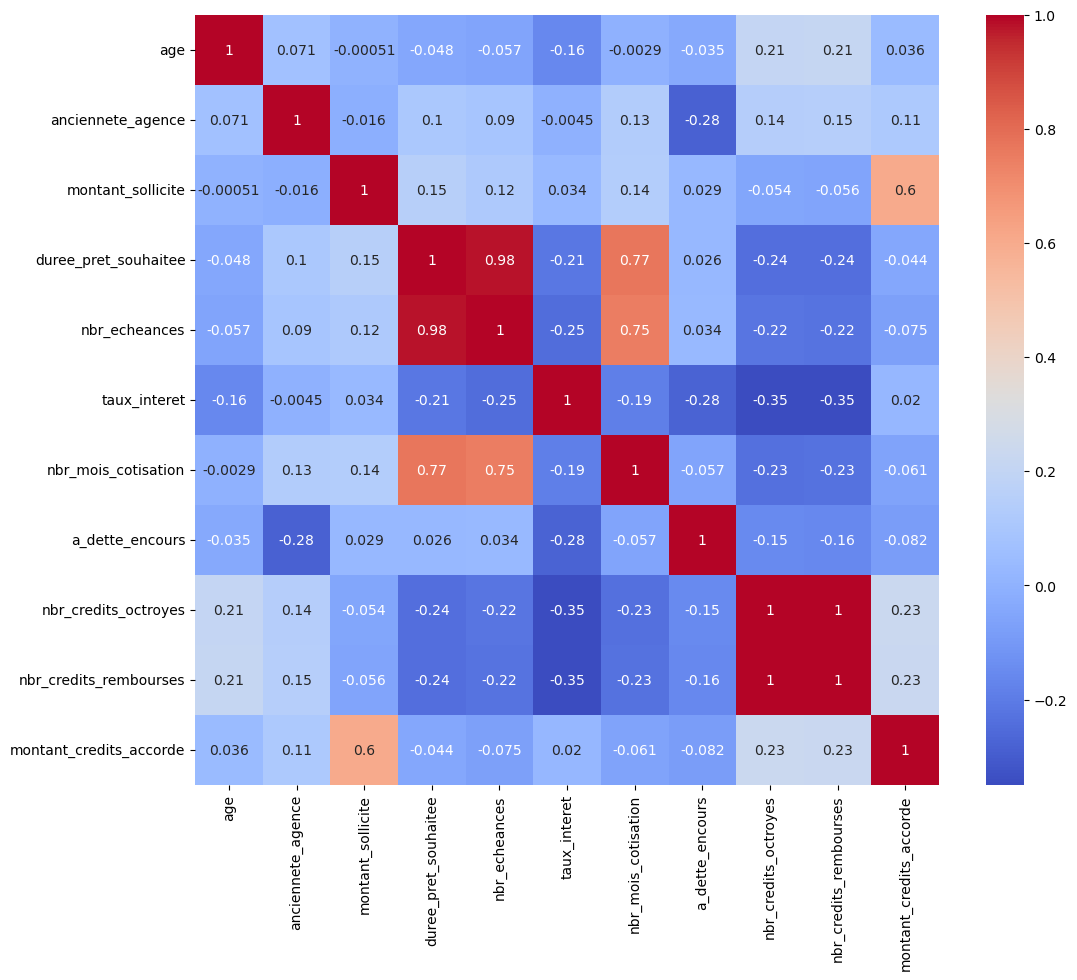

In [36]:
corr_matrix=train.corr()
plt.figure(figsize=(12, 10))
# Affichage de la matrice de corrélation sous forme de heatmap avec seaborn
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

In [37]:
verifie=train[train['nbr_credits_octroyes']!=train['nbr_credits_rembourses']]
verifie.shape


(5382, 18)

In [38]:
doublons = train.duplicated()

#train = train.drop_duplicates()
train.shape

(13693, 18)

In [39]:
variables = [
    'r', 
    'profession', 
    'age', 
    'sexe', 
    'anciennete_agence',  
    'duree_pret_souhaitee', 
    'nbr_echeances', 
    'taux_interet',
    'secteur_activite',
    'ssecteur_activite',
    'nbr_mois_cotisation',
    'a_dette_encours',
     'nbr_credits_octroyes', 
    'nbr_credits_rembourses',
       'montant_credits_accorde',
    'montant_sollicite'
]


In [40]:

#On a pas assez de 1 mais beaucoup de 0
train_0 = train[train['a_dette_encours'] == 0]
train_0=train_0.drop_duplicates(subset=variables,keep='last')
# Concaténer le DataFrame nettoyé avec les lignes de classe 1
train = pd.concat([train_0, train[train['a_dette_encours'] == 1]])
train.shape

(12187, 18)

# 1-3 Variables quantitative

# 1-3-1 Analyse univarié

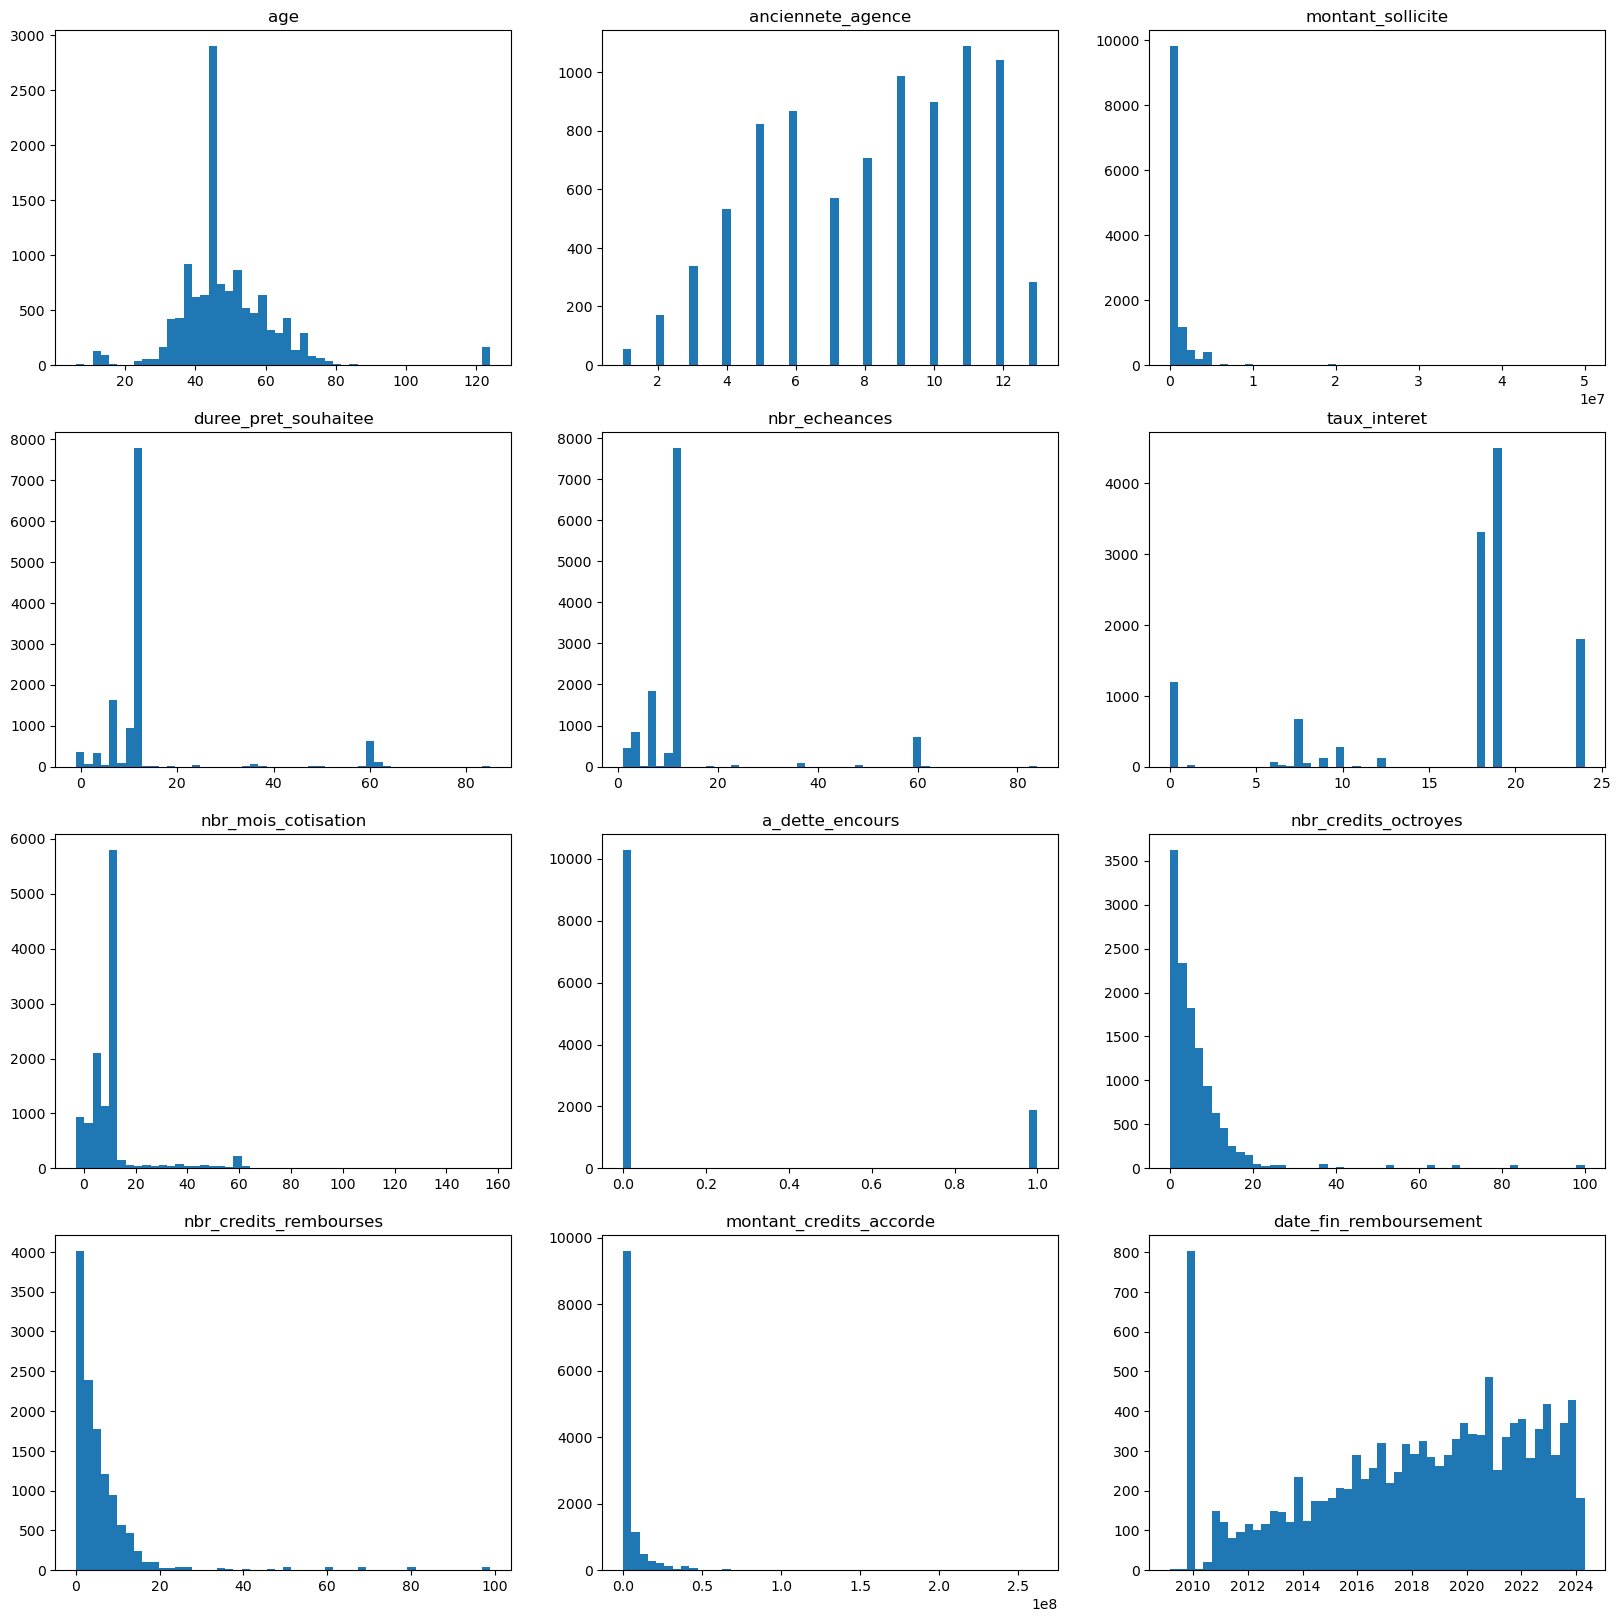

In [41]:
trainquan =train.select_dtypes(exclude=["object"])
# Visualisation de la distribution des variables
fig, axs = plt.subplots(4, 3, figsize=(20, 20))
axs = axs.ravel()

for i, column in enumerate(trainquan.columns):
    axs[i].hist(train[column], bins=50)
    axs[i].set_title(column)

plt.show()

# 1-3-2Analyse Dependante-explicative

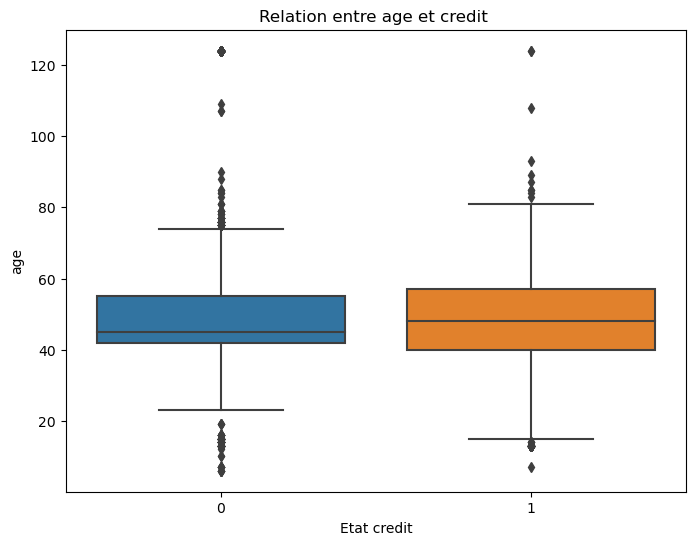

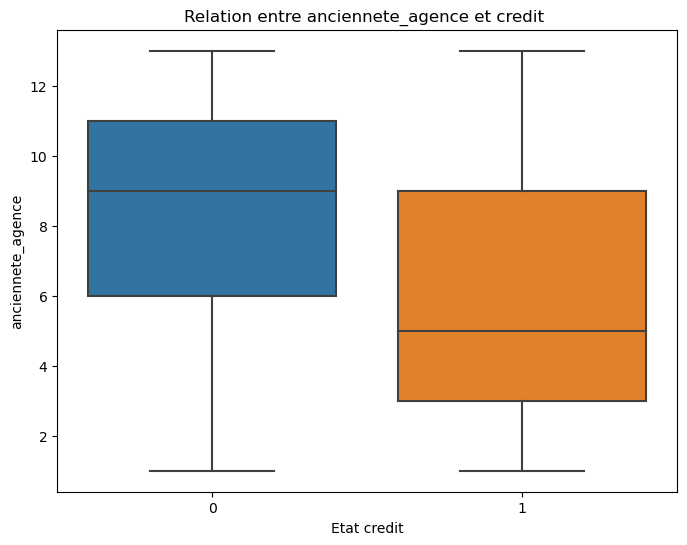

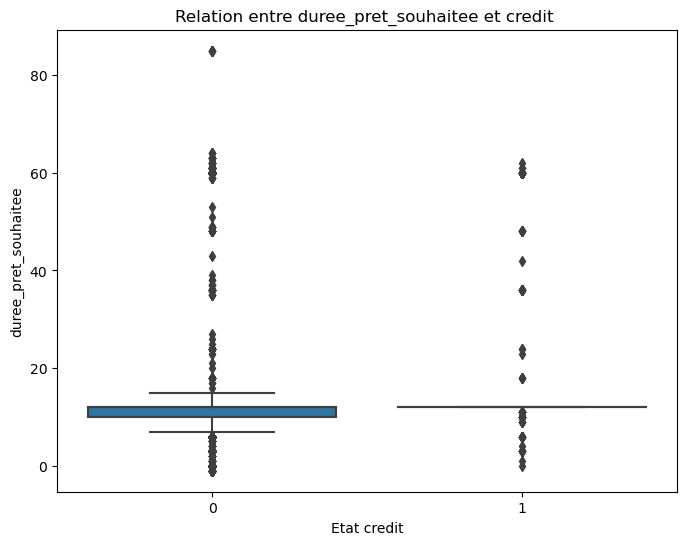

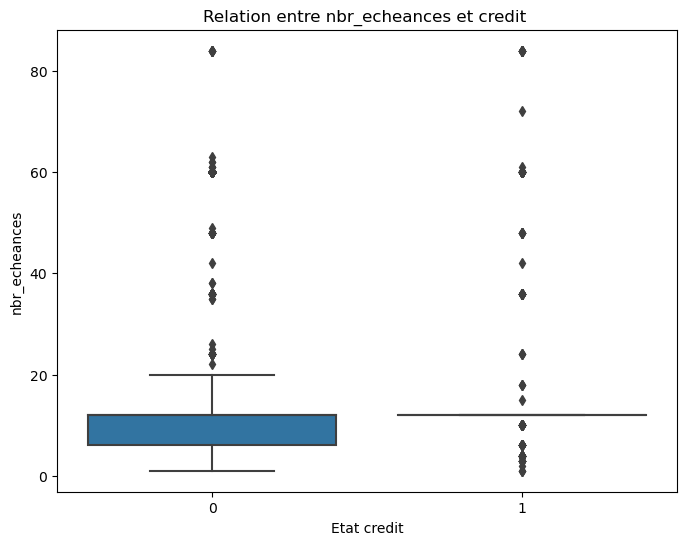

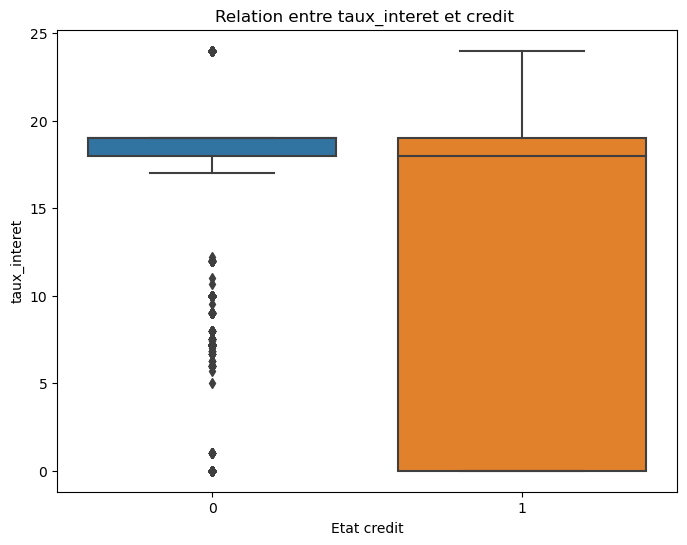

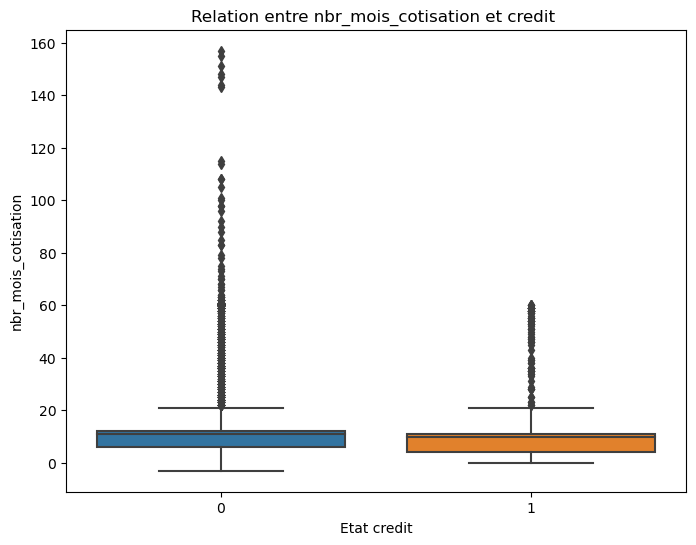

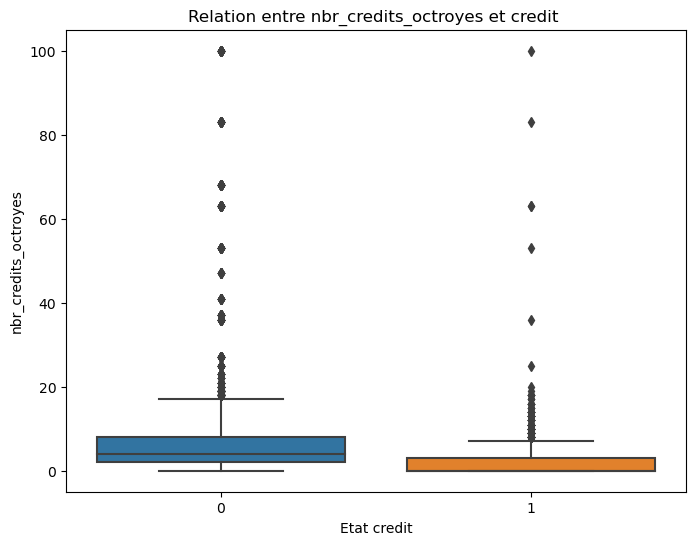

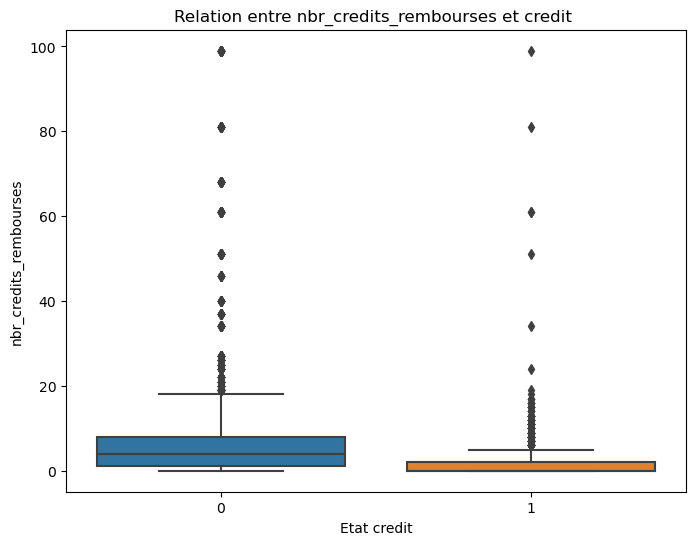

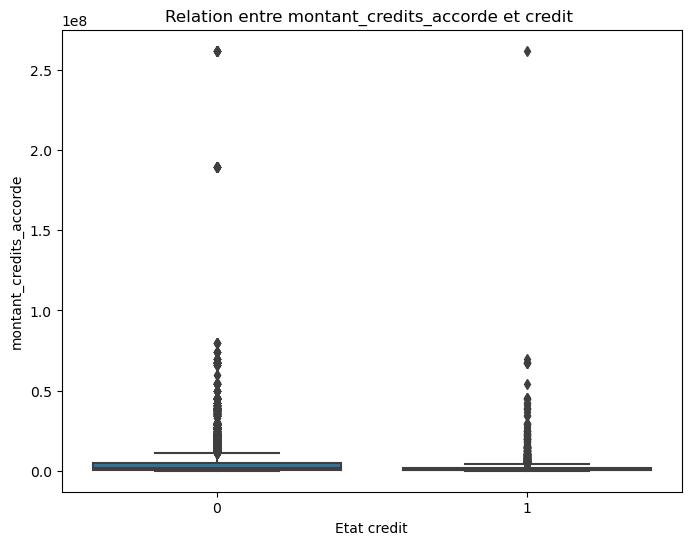

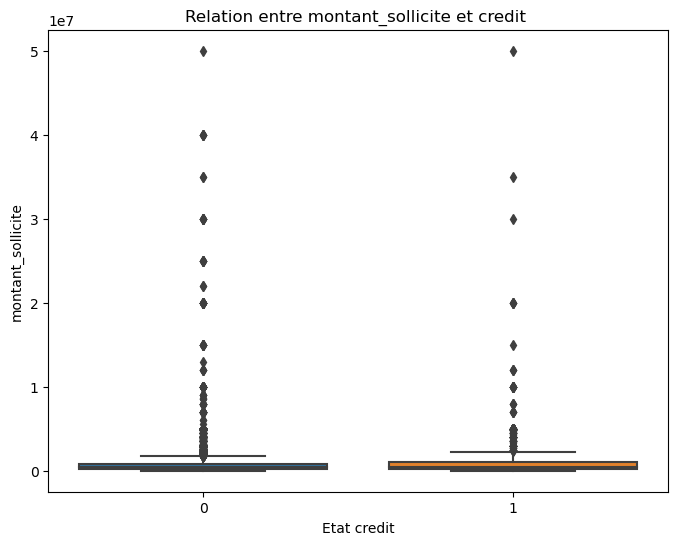

In [42]:
#plus bas j'ai eu a constaté que 
variables_quan = [ 
    'age', 
    'anciennete_agence',  
    'duree_pret_souhaitee', 
    'nbr_echeances', 
    'taux_interet',
    'nbr_mois_cotisation',
     'nbr_credits_octroyes', 
    'nbr_credits_rembourses',
       'montant_credits_accorde',
    'montant_sollicite',
]

# Créer un boxplot de la relation entre
for ind in variables_quan:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=train, x='a_dette_encours', y=ind)
    plt.xlabel('Etat credit')
    plt.ylabel(ind)
    plt.title(f'Relation entre {ind} et credit ')
    plt.show()

In [43]:
train[train.duree_pret_souhaitee==12].a_dette_encours.value_counts()
nbr=train.duree_pret_souhaitee.unique()
train_ = pd.DataFrame(columns=['Duree', 'Payé', 'Non_Payé', 'Pourcentage'])
for i in nbr:
    e = train[train.duree_pret_souhaitee == i]
    f = e[e.a_dette_encours == 1].shape[0]  # Payés
    g = e[e.a_dette_encours == 0].shape[0]  # Non payés
    
    # Créer un nouveau DataFrame avec les résultats
    train_ = train_.append({
        'Duree': i,
        'Payé': g,
        'Non_Payé': f,
        'Pourcentage': f / (f + g) * 100 if (f + g) > 0 else 0
    }, ignore_index=True)

# Ordonner par Duree
train_ = train_.sort_values(by='Duree')

# Réinitialiser l'index si nécessaire
train_ = train_.reset_index(drop=True)
train_

C:\Users\HOME\AppData\Local\Temp\ipykernel_14776\1659827124.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_ = train_.append({
C:\Users\HOME\AppData\Local\Temp\ipykernel_14776\1659827124.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_ = train_.append({
C:\Users\HOME\AppData\Local\Temp\ipykernel_14776\1659827124.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_ = train_.append({
C:\Users\HOME\AppData\Local\Temp\ipykernel_14776\1659827124.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_ = train_.append({
C:\Users\HOME\AppData\Local\Temp\ipykernel_14776\1659827124.py:10: FutureWarning: The frame.

Duree    Payé  Non_Payé  Pourcentage
0    -1.0    92.0       0.0     0.000000
1     0.0   276.0       1.0     0.361011
2     1.0    38.0       1.0     2.564103
3     2.0    14.0       0.0     0.000000
4     3.0   321.0      10.0     3.021148
5     4.0    13.0       1.0     7.142857
6     5.0    29.0       0.0     0.000000
7     6.0  1603.0      11.0     0.681537
8     7.0     5.0       0.0     0.000000
9     8.0     9.0       0.0     0.000000
10    9.0    67.0       4.0     5.633803
11   10.0   242.0      23.0     8.679245
12   11.0   656.0      15.0     2.235469
13   12.0  6061.0    1727.0    22.175141
14   13.0     7.0       0.0     0.000000
15   14.0     4.0       0.0     0.000000
16   15.0     4.0       0.0     0.000000
17   16.0     1.0       0.0     0.000000
18   17.0     2.0       0.0     0.000000
19   18.0    16.0       4.0    20.000000
20   20.0     1.0       0.0     0.000000
21   21.0     1.0       0.0     0.000000
22   23.0     2.0       1.0    33.333333
23   24.0    35.0       2.0     5.405405
24   25.0     1.0       0.0     0.000000
25   26.0     1.0       0.0     0.000000
26   27.0     1.0       0.0     0.000000
27   35.0     4.0       0.0     0.000000
28   36.0    51.0      12.0    19.047619
29   37.0     4.0       0.0     0.000000
30   38.0     3.0       0.0     0.000000
31   39.0     1.0       0.0     0.000000
32   42.0     0.0       1.0   100.000000
33   43.0     1.0       0.0     0.000000
34   48.0    15.0       6.0    28.571429
35   49.0     7.0       0.0     0.000000
36   51.0     1.0       0.0     0.000000
37   53.0     1.0       0.0     0.000000
38   59.0     6.0       0.0     0.000000
39   60.0   563.0      68.0    10.776545
40   61.0    82.0       2.0     2.380952
41   62.0    26.0       1.0     3.703704
42   63.0    19.0       0.0     0.000000
43   64.0     4.0       0.0     0.000000
44   85.0     7.0       0.0     0.000000

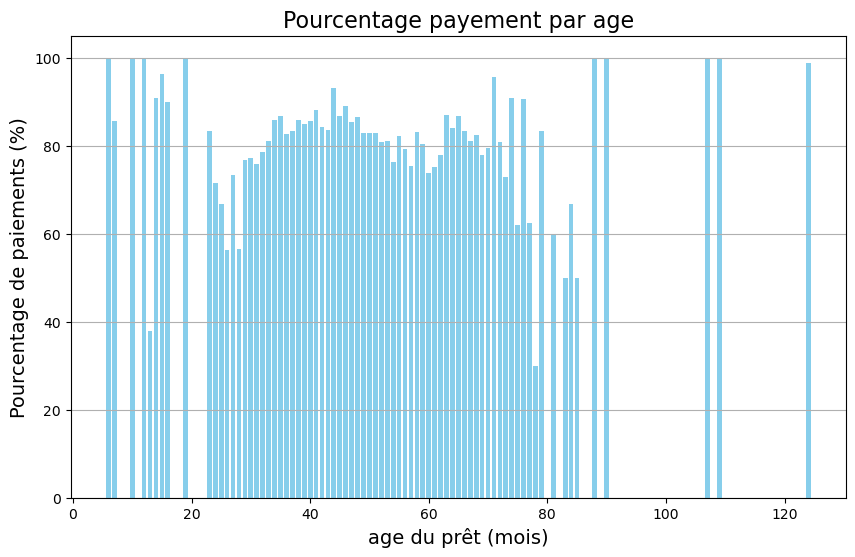

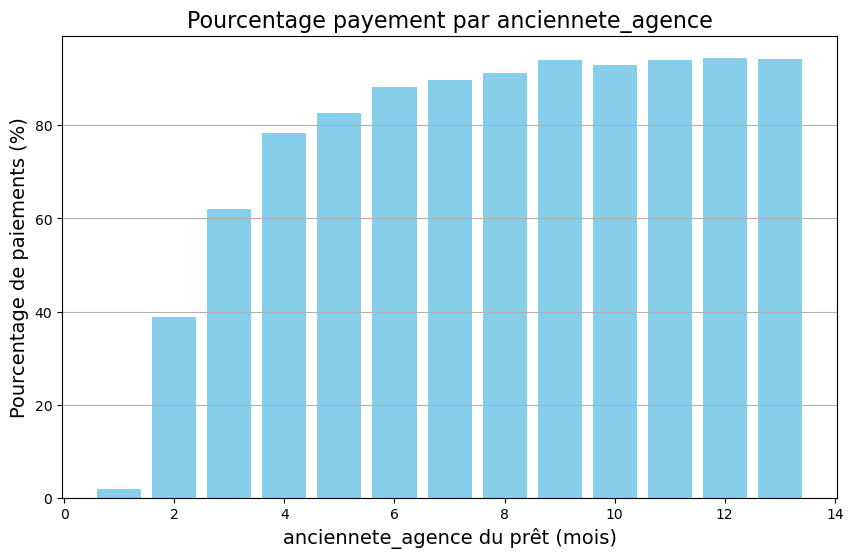

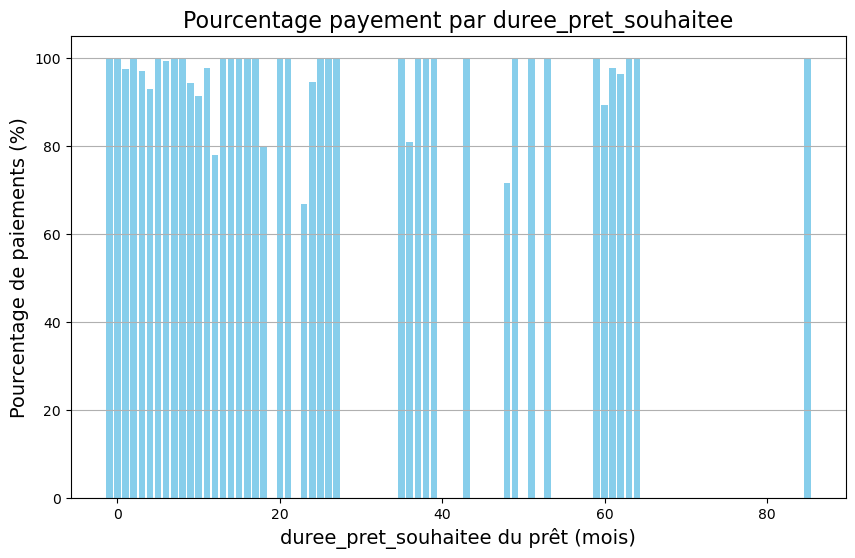

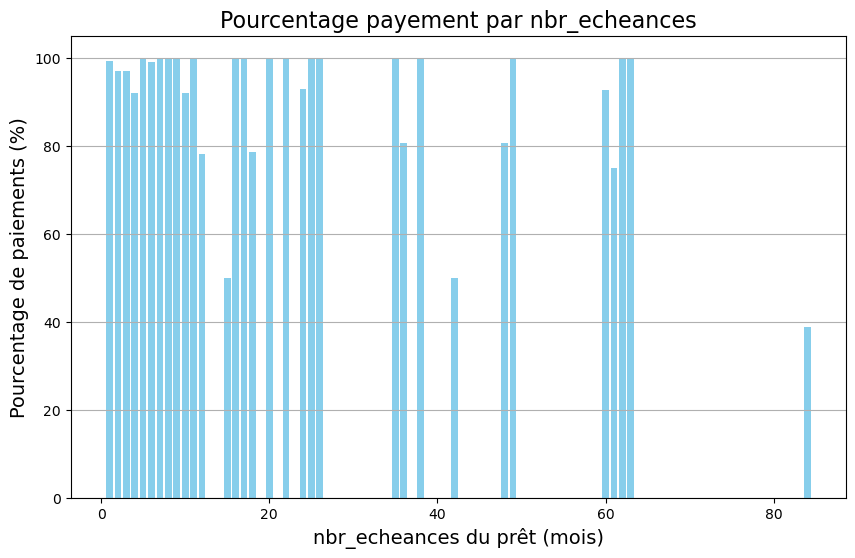

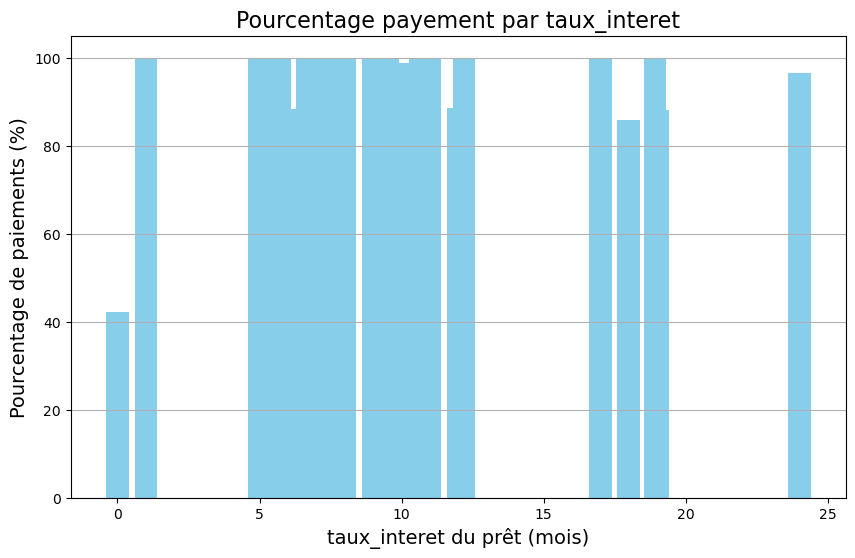

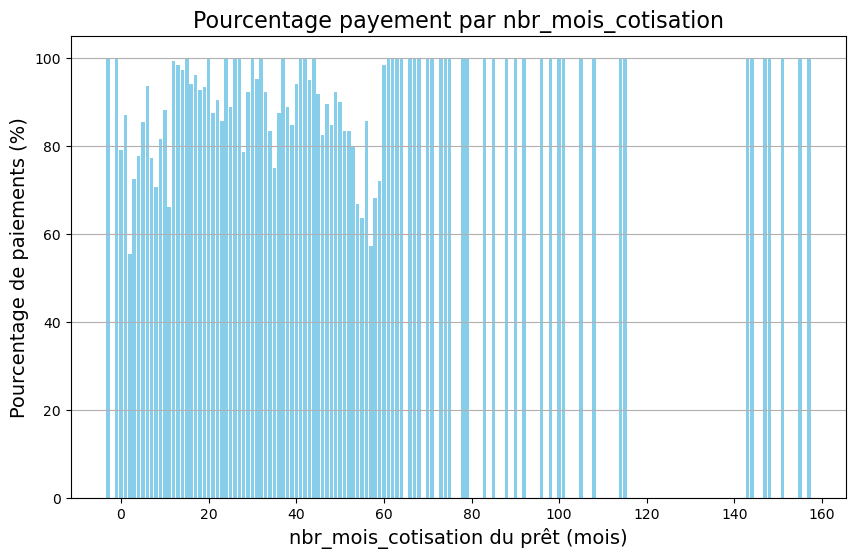

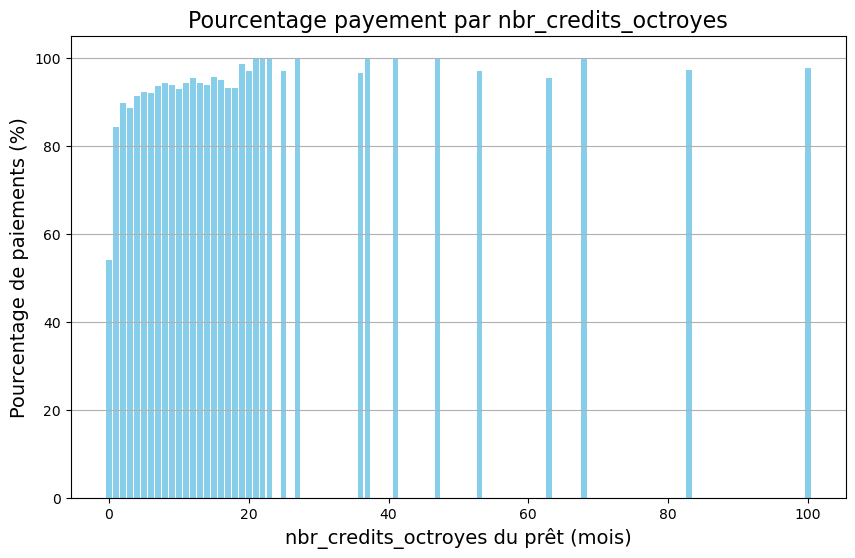

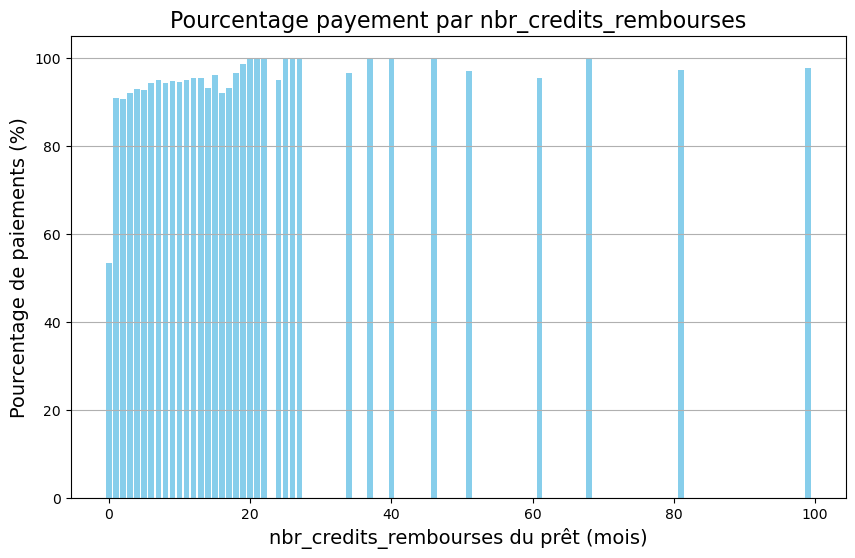

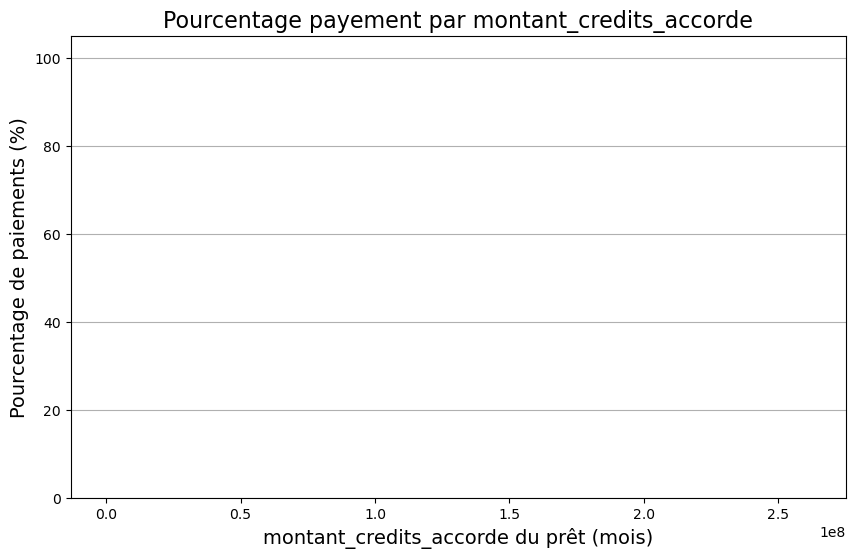

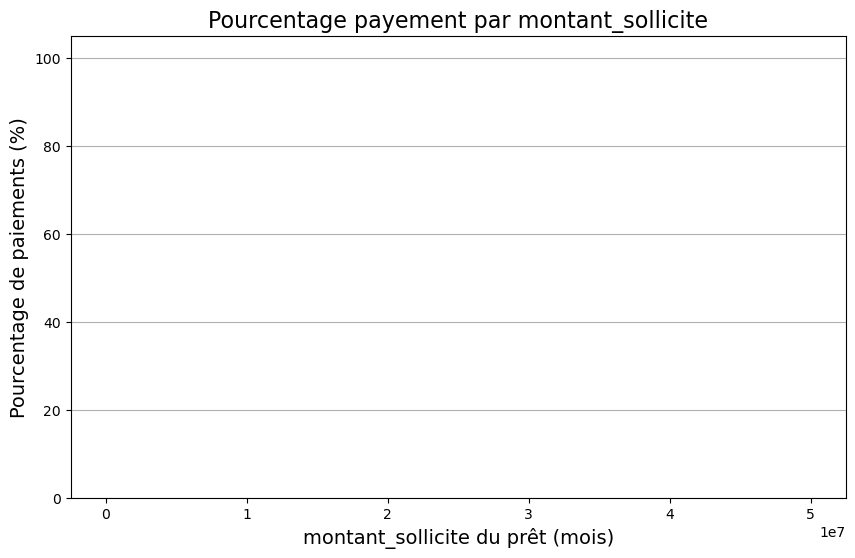

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

for ind in variables_quan:
    nbr = train[ind].unique()
    
    # Créer une liste pour stocker les résultats
    results = []
    
    for i in nbr:
        e = train[train[ind] == i]
        f = e[e.a_dette_encours == 1].shape[0]  # Payés
        g = e[e.a_dette_encours == 0].shape[0]  # Non payés

        # Calculer le pourcentage et ajouter à la liste
        pourcentage = g / (f + g) * 100 if (f + g) > 0 else 0
        results.append({ind: i, 'Pourcentage': pourcentage})

    # Créer un DataFrame à partir des résultats
    train_ = pd.DataFrame(results)

    # Ordonner par l'indicateur
    train_ = train_.sort_values(by=ind).reset_index(drop=True)

    # Affichage du graphique
    plt.figure(figsize=(10, 6))
    plt.bar(train_[ind], train_['Pourcentage'], color='skyblue')

    # Ajout de titres et labels
    plt.title(f'Pourcentage payement par {ind}', fontsize=16)
    plt.xlabel(f'{ind} du prêt (mois)', fontsize=14)
    plt.ylabel('Pourcentage de paiements (%)', fontsize=14)
    #plt.xticks(range(0, 80, 5))  # Affiche les valeurs de Duree sur l'axe x

    # Affichage du graphique
    plt.grid(axis='y')
    plt.show()


# 1-3-3 Analyse mutivarié

# ACP

Plutard

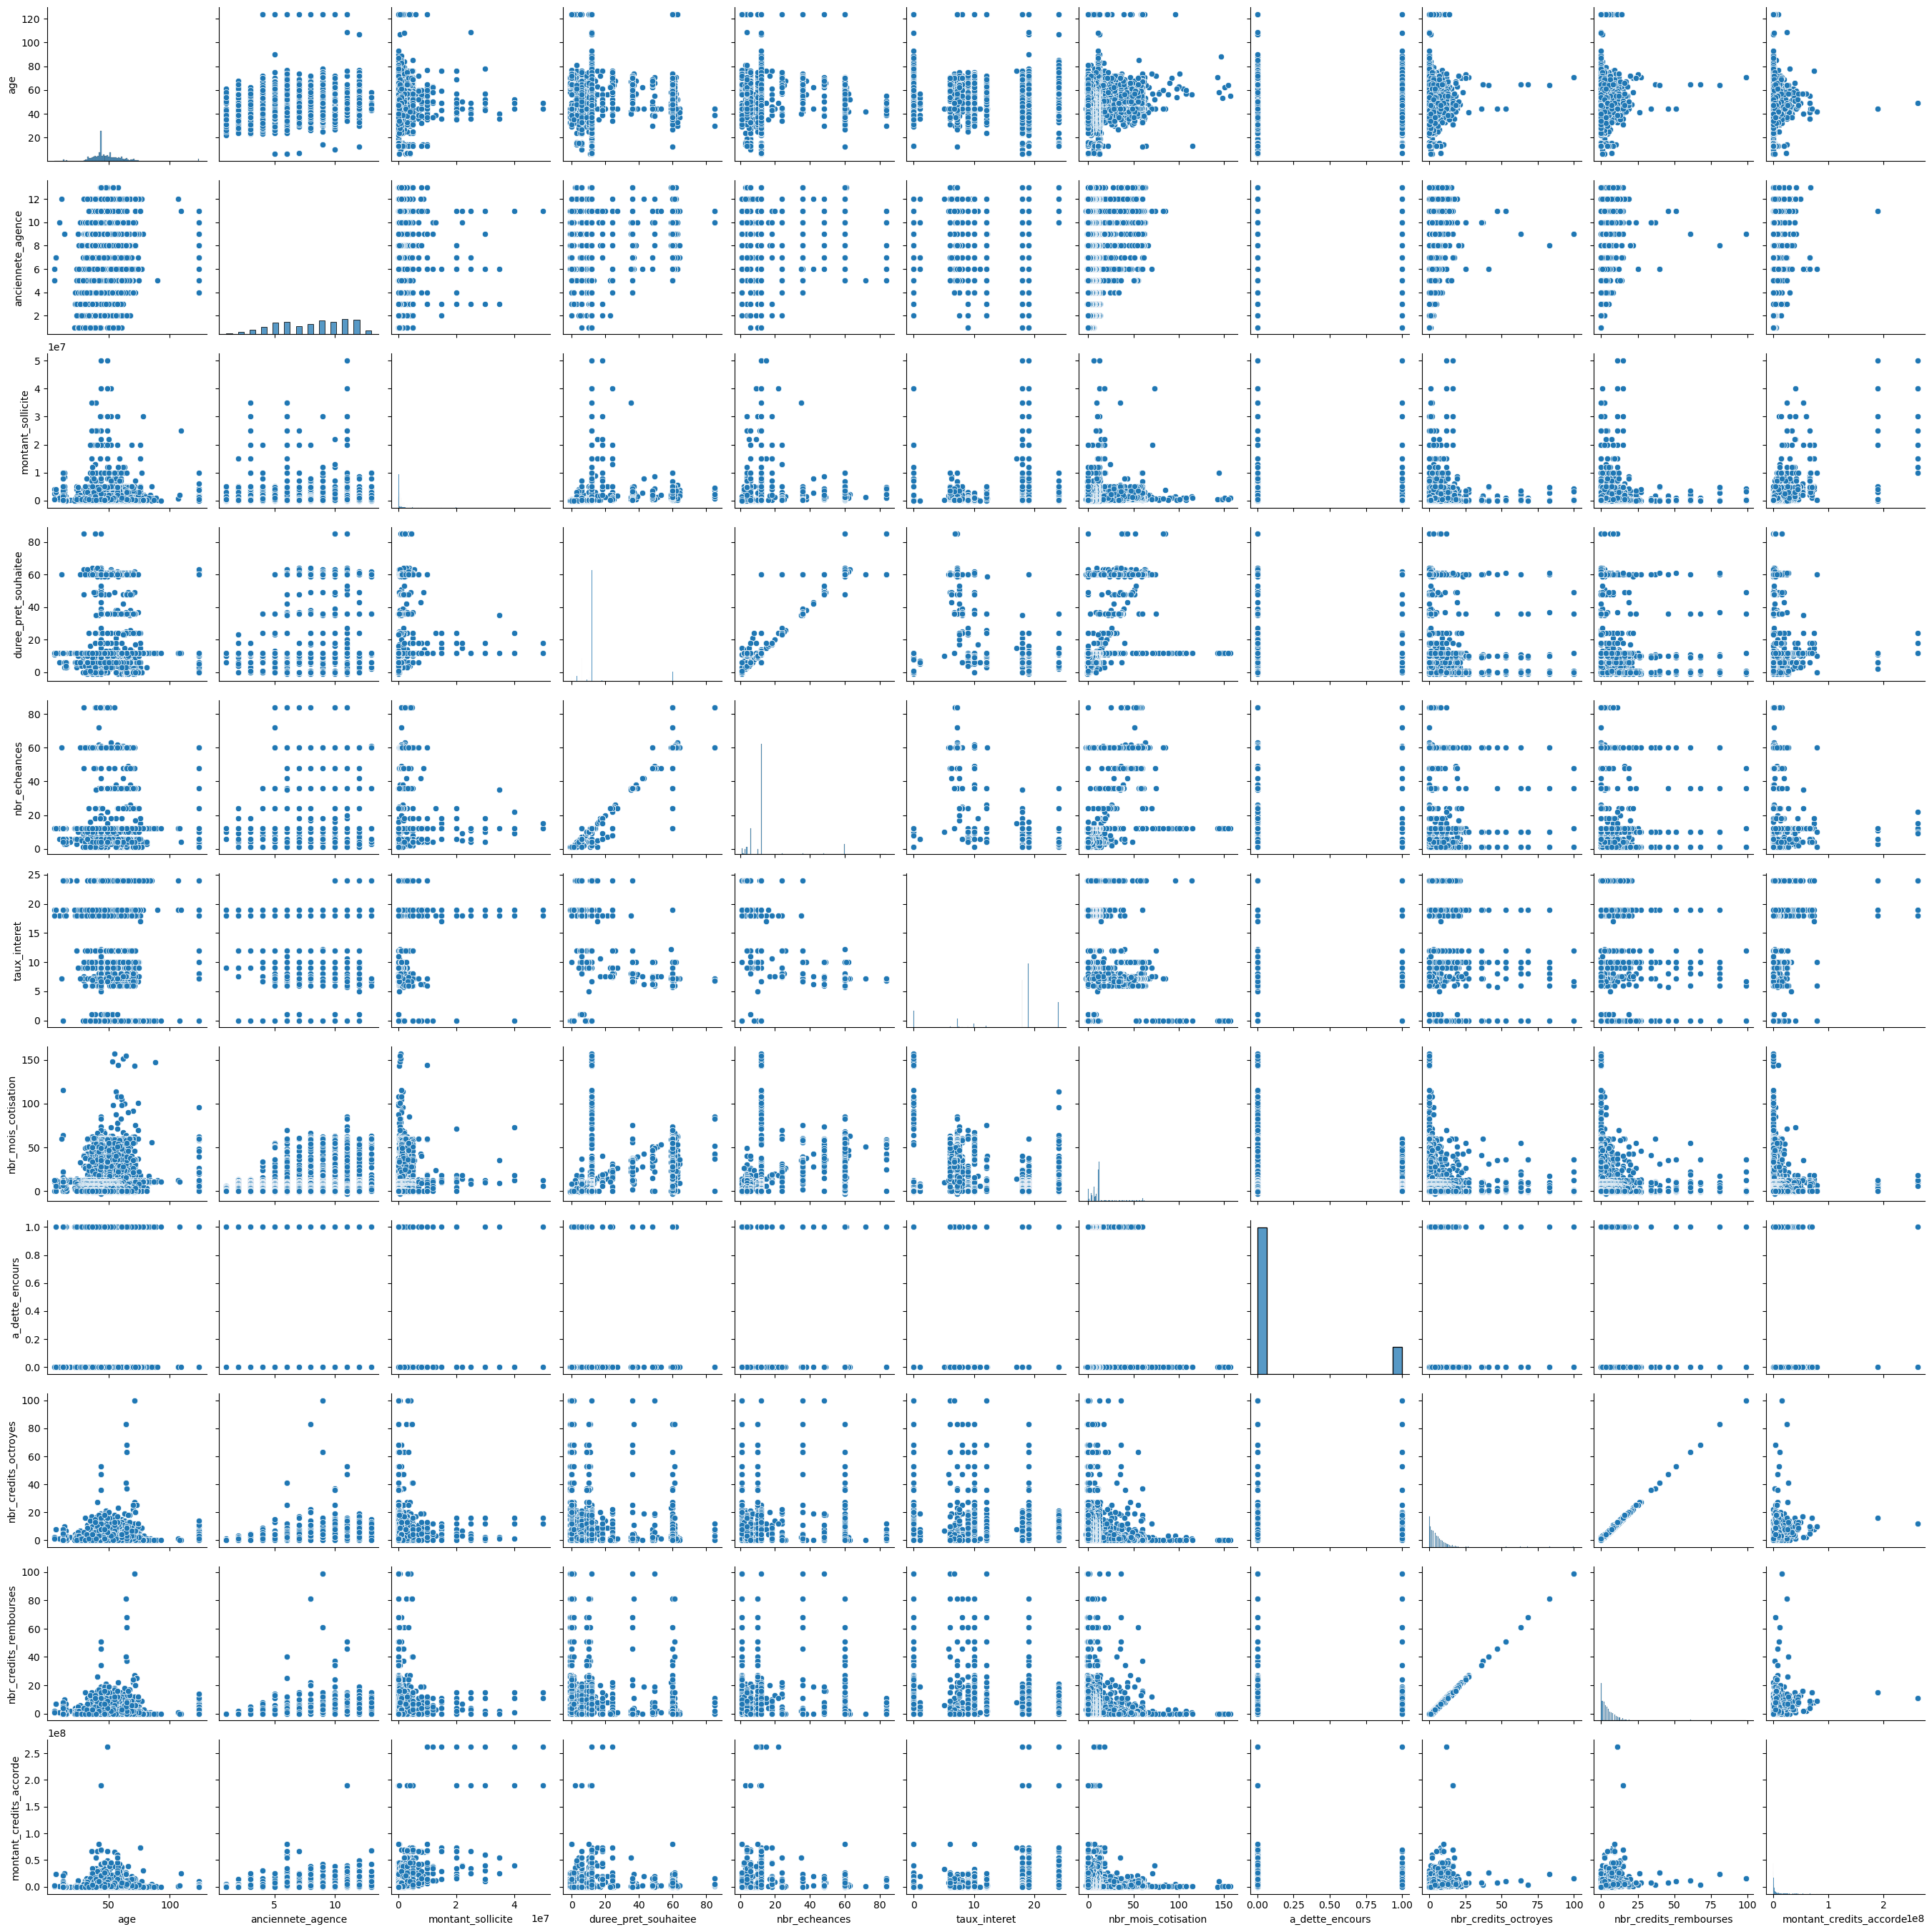

In [45]:
sns.pairplot(train)

# 1-4-Qualitative

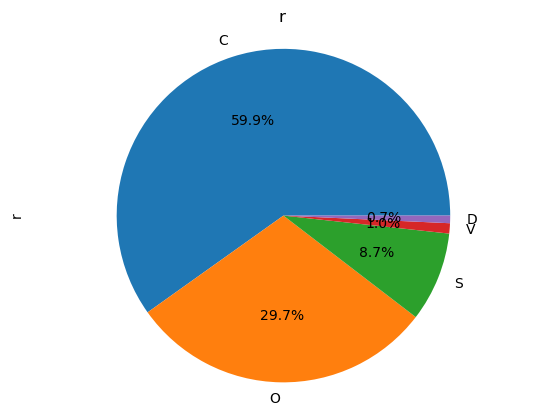

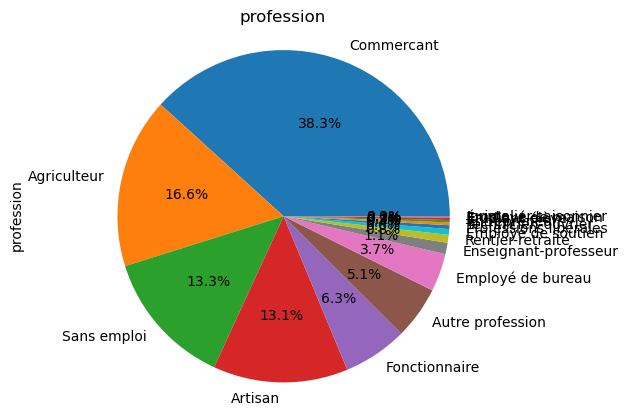

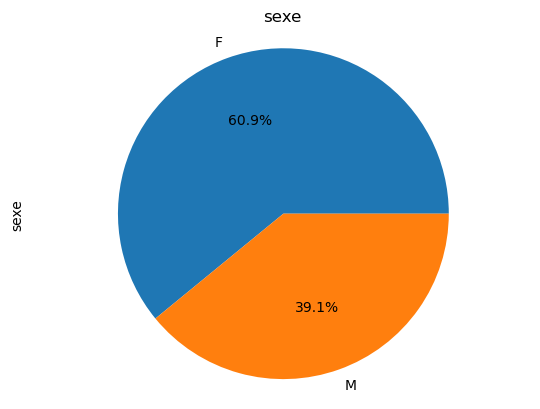

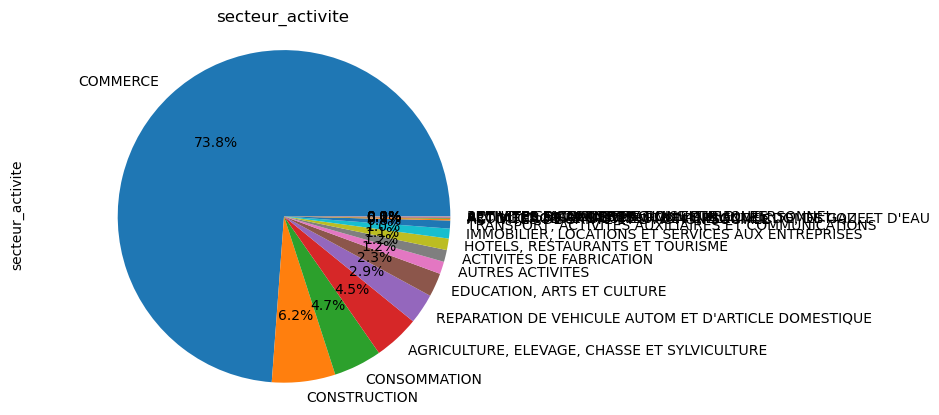

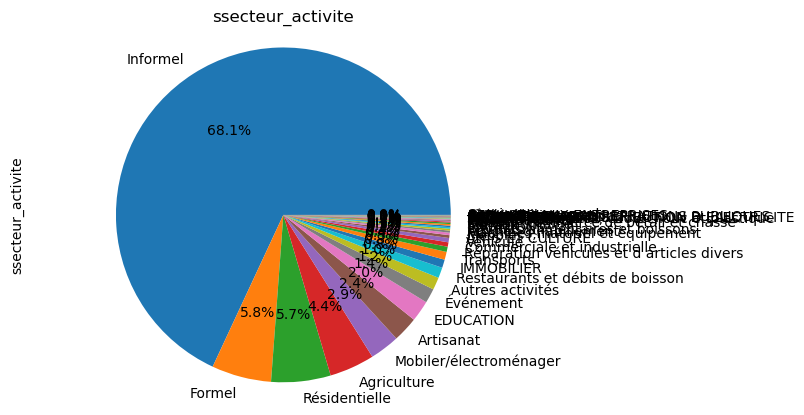

In [46]:
val_quali=['r', 'profession', 'sexe','secteur_activite','ssecteur_activite']
for var in val_quali :
    train[var].value_counts().plot(kind='pie',autopct='%1.1f%%')
    plt.title(var)
    plt.axis('equal')
    plt.show()

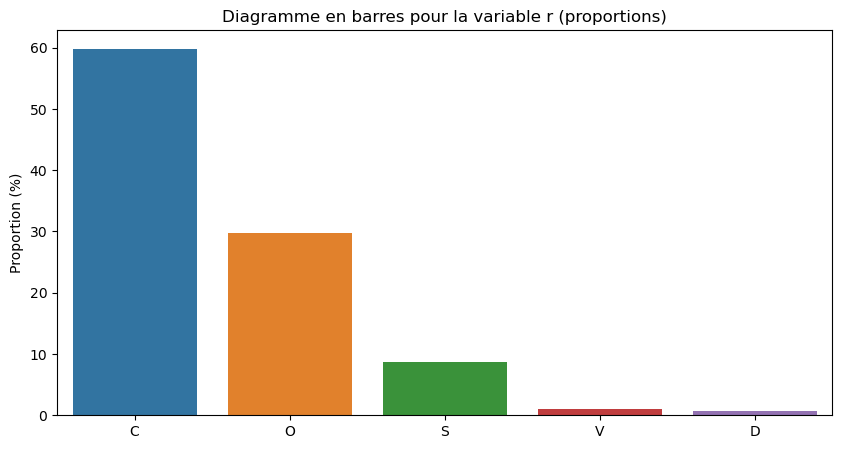

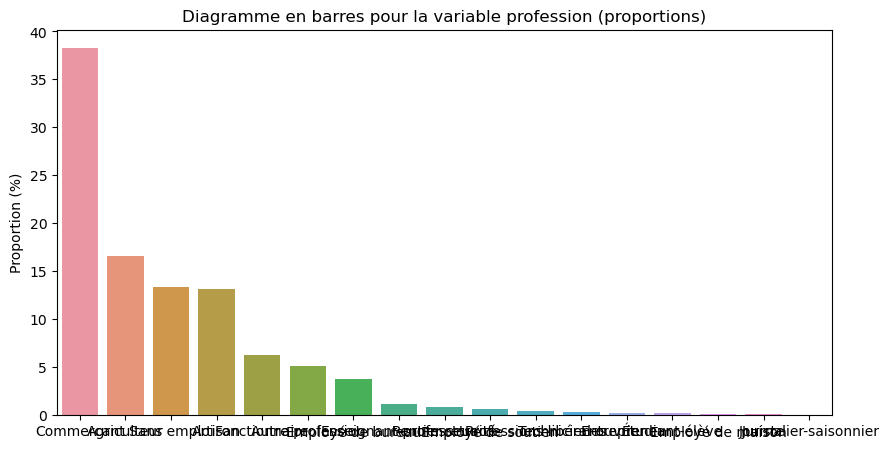

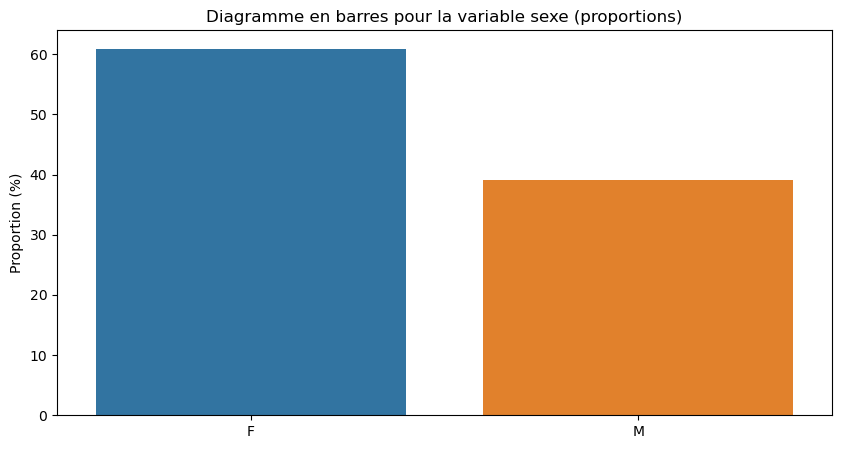

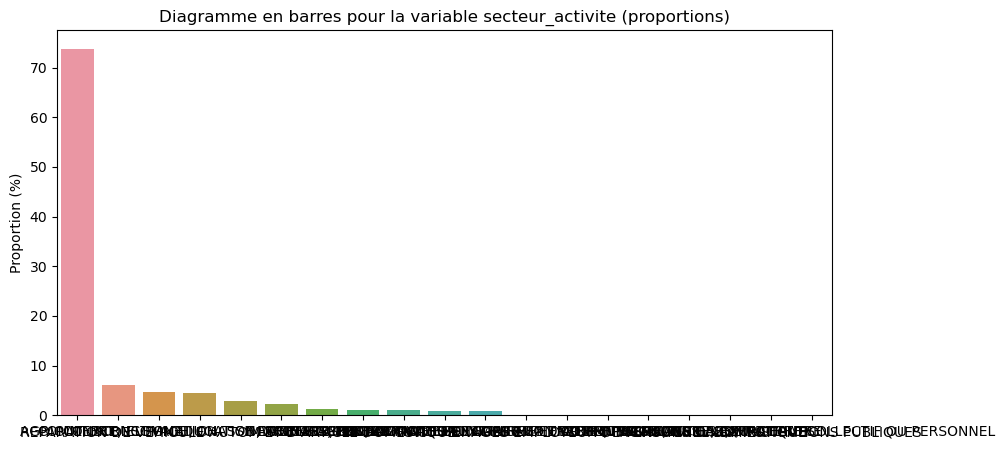

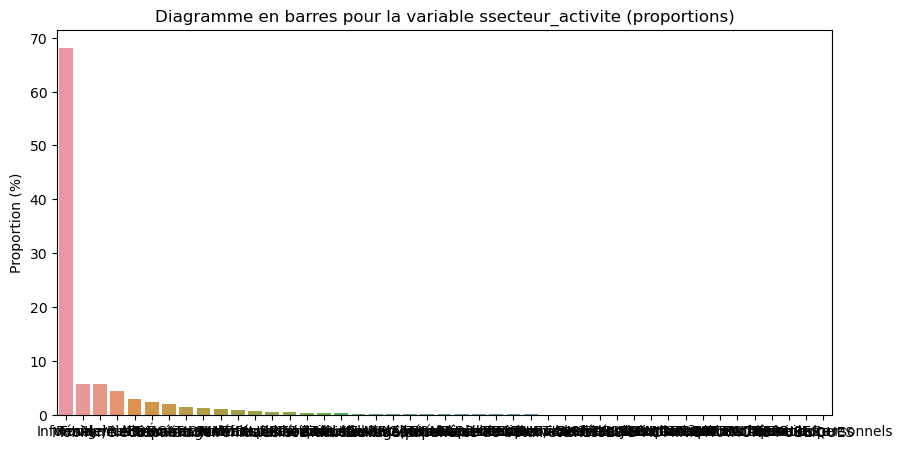

In [47]:

# Créer des graphiques pour les variables catégorielles en termes de proportion
for col in val_quali:
    plt.figure(figsize=(10, 5))
    proportions = train[col].value_counts(normalize=True) * 100
    sns.barplot(x=proportions.index, y=proportions.values)
    plt.title(f"Diagramme en barres pour la variable {col} (proportions)")
    plt.ylabel('Proportion (%)')
    plt.show()

In [48]:
for col in val_quali:
    print(f"\nFréquences de la variable {col}:")
    print(train[col].value_counts())


Fréquences de la variable r:
C    7294
O    3624
S    1059
V     121
D      89
Name: r, dtype: int64

Fréquences de la variable profession:
Commercant               4663
Agriculteur              2022
Sans emploi              1619
Artisan                  1599
Fonctionnaire             763
Autre profession          624
Employé de bureau         450
Enseignant-professeur     135
Rentier-retraité           94
Employé de soutien         68
Professions libérales      45
Technicien-ouvrier         33
Entrepreneur               28
Étudiant-élève             27
Employé de maison           8
Juriste                     8
Journalier-saisonnier       1
Name: profession, dtype: int64

Fréquences de la variable sexe:
F    7425
M    4762
Name: sexe, dtype: int64

Fréquences de la variable secteur_activite:
COMMERCE                                                      8997
CONSTRUCTION                                                   751
CONSOMMATION                                                 

# Visualisation mutivarie var quali

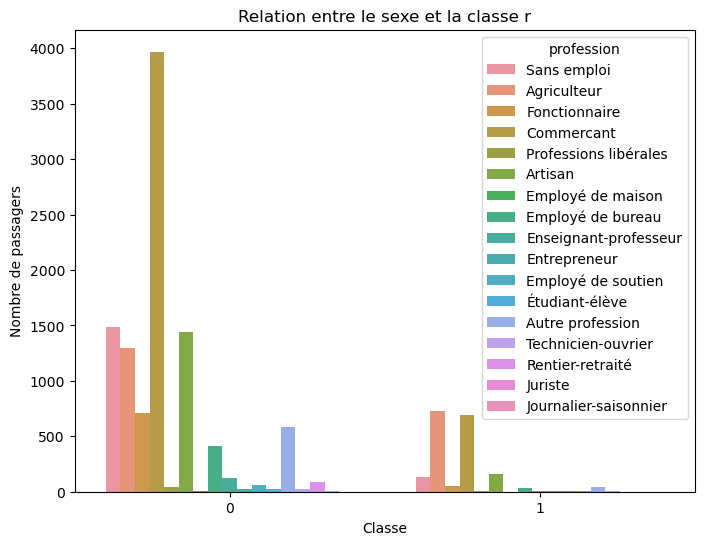

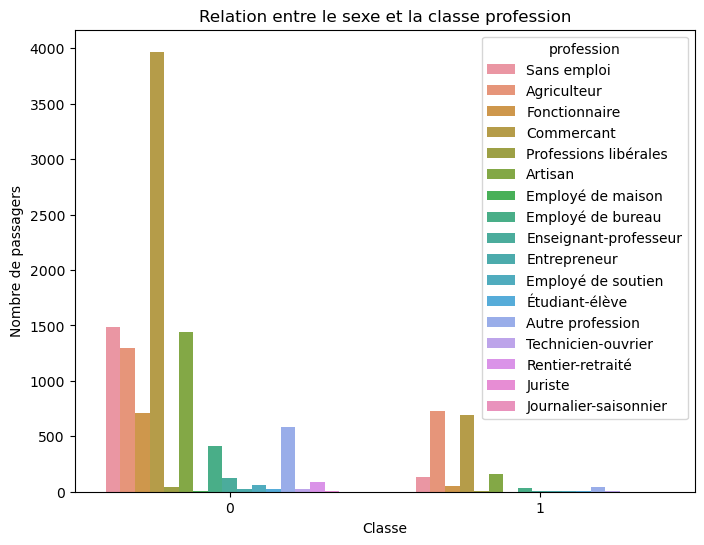

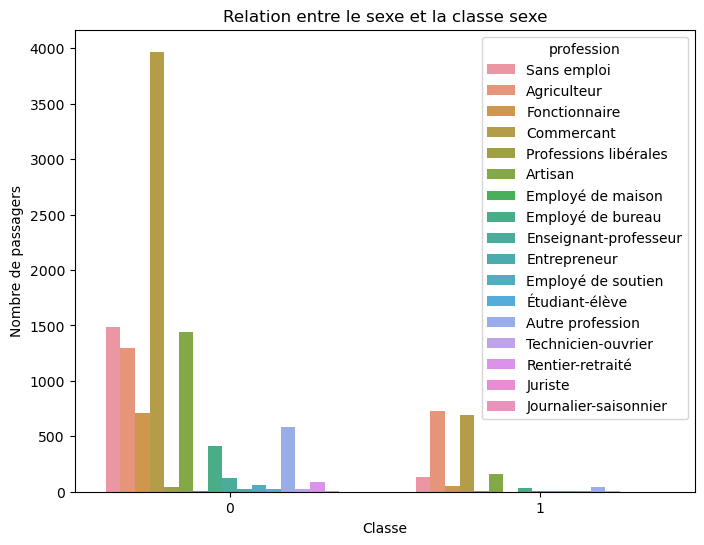

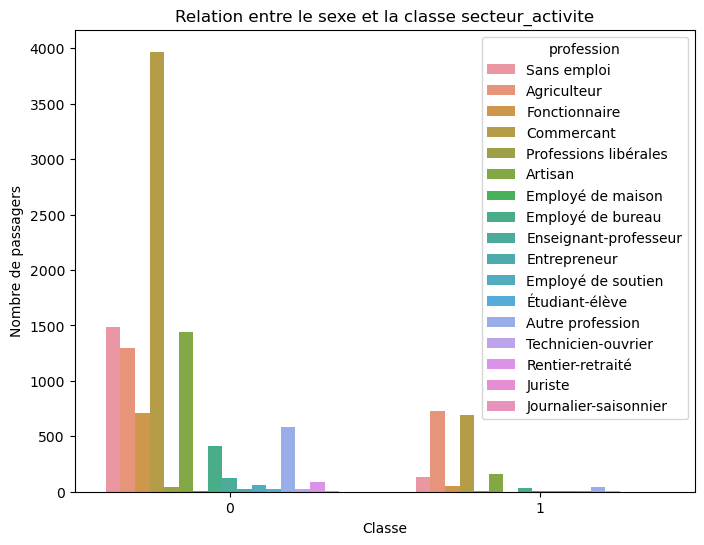

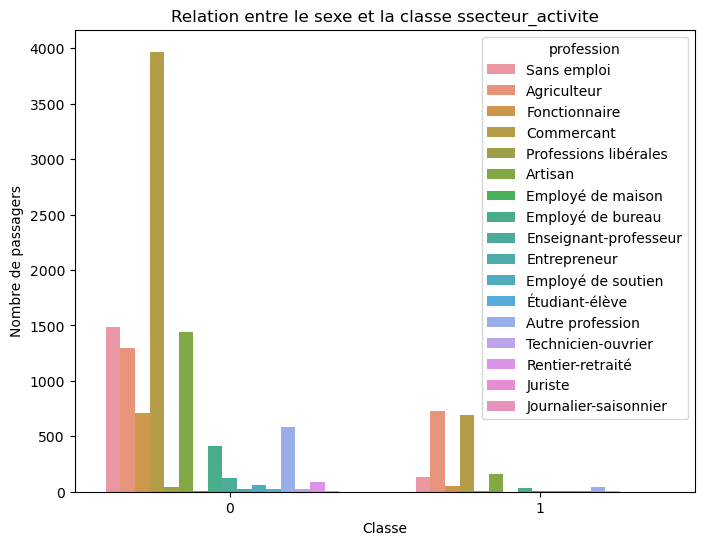

In [49]:
for col1 in val_quali:
    # Créer un graphique de la relation entre 'sex' et 'class' dans Titanic
    plt.figure(figsize=(8, 6))
    sns.countplot(data=train, x='a_dette_encours', hue='profession')
    plt.xlabel('Classe')
    plt.ylabel('Nombre de passagers')
    plt.title(f"Relation entre le sexe et la classe {col1}")
    plt.show()

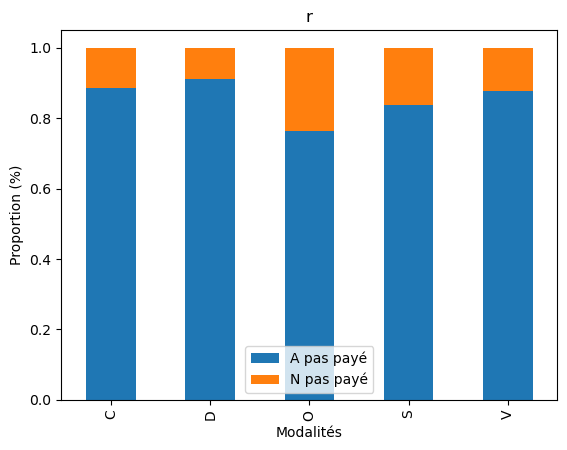

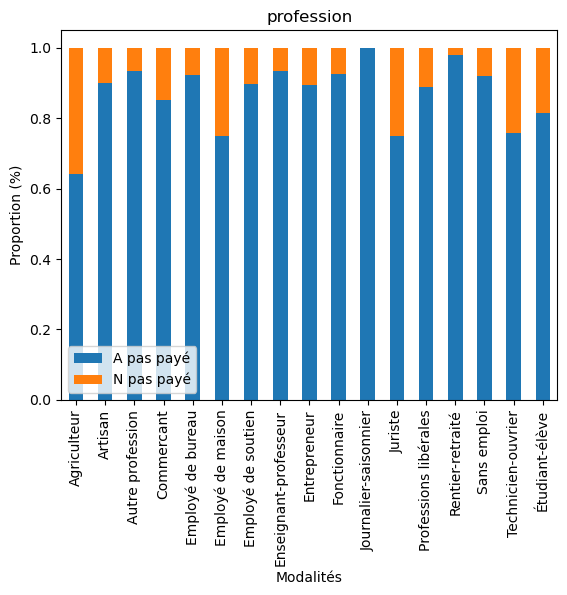

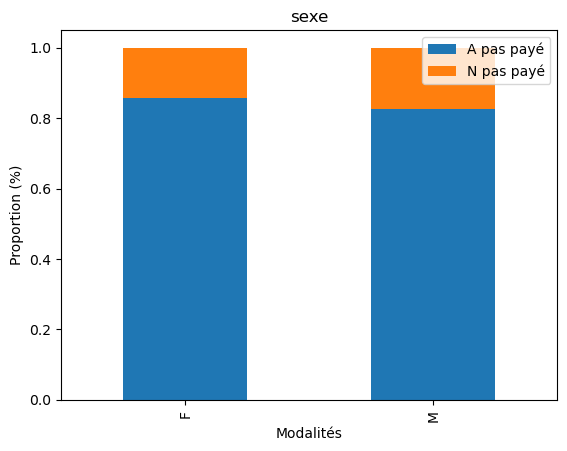

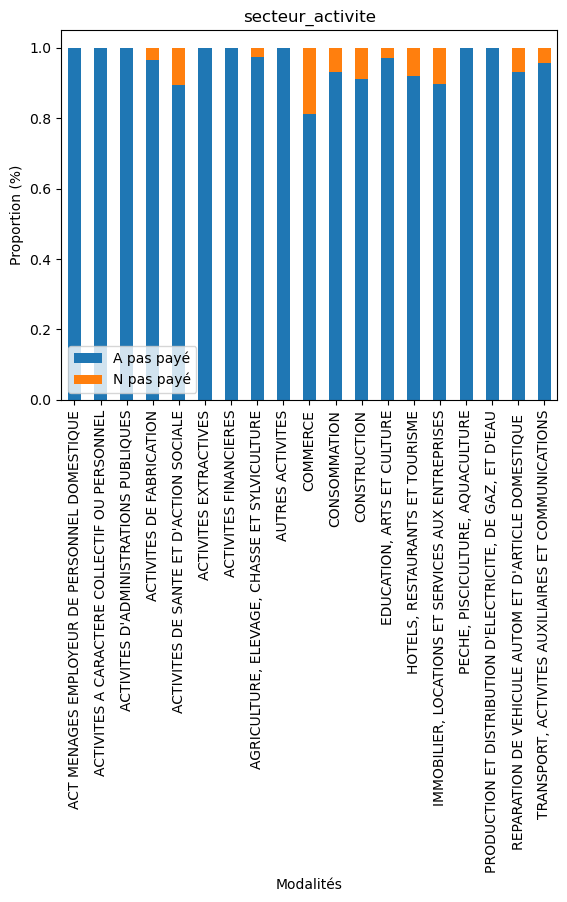

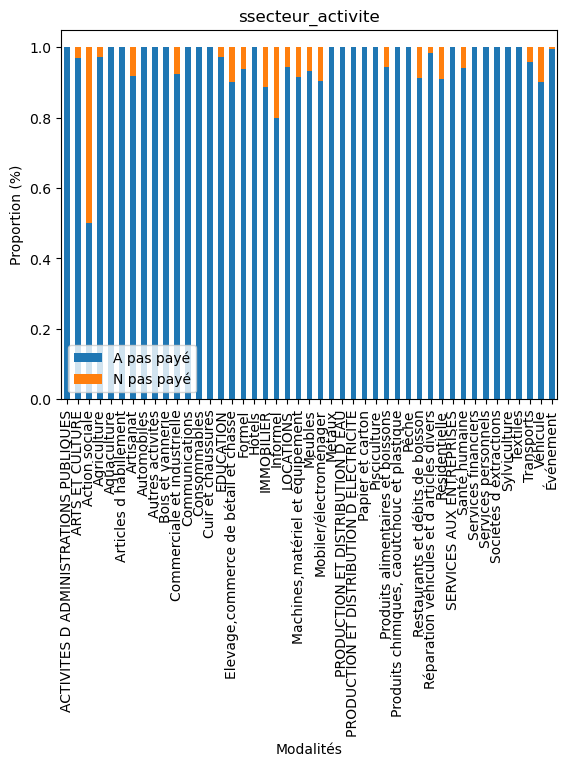

In [50]:

# Générer un bar plot pour chaque variable catégorielle
for var in val_quali:
    figsize = (20, 20)
    (train.groupby([var, 'a_dette_encours'])['a_dette_encours'].count()/train.groupby([var])[var].count()).unstack(level=1).plot(kind='bar', stacked=True)
    plt.title(var)
    plt.xlabel('Modalités')
    plt.ylabel('Proportion (%)')
    plt.legend(['A pas payé', 'N pas payé'])
    plt.show()

In [51]:
# Calcul de chi deux sur la base titanic
from scipy.stats import chi2_contingency
# Créer un tableau de contingence
contingency_table = pd.crosstab(train['ssecteur_activite'],train['profession'])

# Filtrer les combinaisons avec des valeurs non nulles
non_null_links = contingency_table[contingency_table > 0].stack().reset_index()
non_null_links.columns = ['ssecteur_activite', 'profession', 'count']

# Trier par count en ordre décroissant
non_null_links_sorted = non_null_links.sort_values(by='count', ascending=False)

# Formater les résultats
formatted_results = non_null_links_sorted.apply(lambda row: f"{row['ssecteur_activite']}--------------------{row['profession']} : {row['count']}", axis=1)

# Afficher les résultats formatés
for result in formatted_results:
    print(result)
formatted_results.shape    

Informel--------------------Commercant : 4101.0
Informel--------------------Agriculteur : 1401.0
Informel--------------------Artisan : 1282.0
Informel--------------------Sans emploi : 778.0
Informel--------------------Autre profession : 433.0
Résidentielle--------------------Fonctionnaire : 363.0
Formel--------------------Commercant : 290.0
Agriculture--------------------Sans emploi : 241.0
Formel--------------------Sans emploi : 182.0
Agriculture--------------------Agriculteur : 181.0
Artisanat--------------------Sans emploi : 165.0
Résidentielle--------------------Sans emploi : 136.0
Formel--------------------Agriculteur : 122.0
Artisanat--------------------Agriculteur : 122.0
Mobiler/électroménager--------------------Fonctionnaire : 98.0
Informel--------------------Employé de bureau : 93.0
EDUCATION--------------------Fonctionnaire : 83.0
Mobiler/électroménager--------------------Employé de bureau : 83.0
Agriculture--------------------Commercant : 74.0
Résidentielle-----------------

(249,)

In [52]:
trainqual=train.select_dtypes(exclude=["int64","float64"])
# Description de la base de données
trainqual.describe(include="all")

C:\Users\HOME\AppData\Local\Temp\ipykernel_14776\2843346338.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  trainqual.describe(include="all")


r  profession   sexe secteur_activite ssecteur_activite  \
count   12187       12187  12187            12187             12187   
unique      5          17      2               19                45   
top         C  Commercant      F         COMMERCE          Informel   
freq     7294        4663   7425             8997              8295   
first     NaN         NaN    NaN              NaN               NaN   
last      NaN         NaN    NaN              NaN               NaN   

                  date_fin_remboursement date_dernier_remboursement  
count                              12187                      12187  
unique                              2661                       7440  
top            2009-12-30 00:00:00+00:00  2009-11-30 00:00:00+00:00  
freq                                 793                        619  
first          2009-02-28 00:00:00+00:00                        NaN  
last    2024-04-21 16:56:01.120000+00:00                        NaN

# 1-5-Tests statistiques

# ## 1. Test du chi-carré (chi2)

### Hypothèses
- H0 (hypothèse nulle): Il n'y a pas d'association entre les deux variables qualitatives.
- H1 (hypothèse alternative): Il y a une association entre les deux variables qualitatives.

### Conditions d'utilisation
- Les deux variables sont qualitatives (catégoriques).
- Les effectifs attendus sont supérieurs à 5 pour chaque croissement de variable

### Interprétation
Si la p-valeur est inférieure au seuil de significativité (généralement 0,05), on rejette l'hypothèse nulle et on conclut qu'il y a une association entre les deux variables qualitatives.



In [53]:
from scipy.stats import chi2_contingency
categorical_columns=val_quali
# Initialiser les DataFrame pour les coefficients de Cramér et les p-values
cramer_v_df = pd.DataFrame(index=categorical_columns, columns=categorical_columns)
p_value_df = pd.DataFrame(index=categorical_columns, columns=categorical_columns)
tschuprow_t_df = pd.DataFrame(index=categorical_columns, columns=categorical_columns)
credit_data=train

# Calculer le test de chi-deux pour chaque paire de variables qualitatives
for i, column1 in enumerate(categorical_columns):
    for j, column2 in enumerate(categorical_columns):
        if column1 != column2:
            contingency_table = pd.crosstab(credit_data[column1], credit_data[column2])
            chi2, p, dof, expected = chi2_contingency(contingency_table)
            cramer_v = np.sqrt(chi2 / (credit_data.shape[0] * (min(contingency_table.shape) - 1)))
            tschuprow_t = cramer_v * np.sqrt((contingency_table.shape[0] - 1) * (contingency_table.shape[1] - 1) / (credit_data.shape[0] - 1))
            cramer_v_df.loc[column1, column2] = cramer_v
            tschuprow_t_df.loc[column1, column2] = tschuprow_t
            p_value_df.loc[column1, column2] = p


            
 
# Afficher la DataFrame des p-values
print("\nDataFrame des p-values :")
p_value_df.style.set_properties(**{'border-color': 'black', 'border-width': '1px', 'border-style': 'solid'})           



DataFrame des p-values :


In [54]:
# Afficher la DataFrame des coefficients de Cramér
from scipy.stats import chi2_contingency
print("DataFrame des coefficients de Cramér :")
cramer_v_df.style.background_gradient(cmap='Greens', high=0.4, low=0).set_properties(**{'border-color': 'black', 'border-width': '1px', 'border-style': 'solid'})


DataFrame des coefficients de Cramér :


In [55]:
# Afficher la DataFrame des coefficients de Tchuprow
print("\nDataFrame des coefficients de Tchuprow :")
tschuprow_t_df.style.background_gradient(cmap='Greens', high=0.4, low=0).set_properties(**{'border-color': 'black', 'border-width': '1px', 'border-style': 'solid'})



DataFrame des coefficients de Tchuprow :


# 2. Préparer et traitement les donnée

# 2-1 Valeurs abérrantes

In [56]:

#On a pas assez de 1 mais beaucoup de 0
train_0 = train[train['a_dette_encours'] == 0]
train_0=train_0.drop_duplicates(subset=variables,keep='last')
# Concaténer le DataFrame nettoyé avec les lignes de classe 1
train = pd.concat([train_0, train[train['a_dette_encours'] == 1]])
train.shape

(12187, 18)

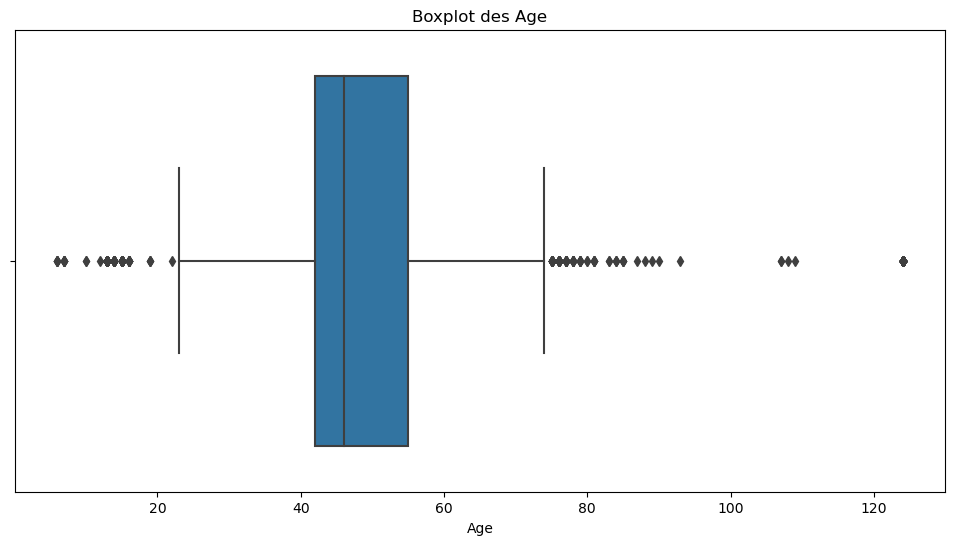

In [57]:
# Valeurs abérrante
#Les  erreurs qui sont plus soupsonné au niveau de l'age
# Visualiser les outliers en utilisant un boxplot avec Seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(data=train, x='age')
plt.xlabel('Age')
plt.title("Boxplot des Age")
plt.show()


La méthode de l'IQR est une approche courante pour identifier les valeurs aberrantes dans des données univariées. Elle utilise l'écart interquartile pour définir une plage de valeurs plausibles et identifie les observations qui sont en dehors de cette plage.

### Définition

L'IQR est défini comme la différence entre le troisième quartile (Q3) et le premier quartile (Q1) de la distribution des données. Les bornes inférieure et supérieure de la plage plausible sont définies comme suit :

- Limite inférieure : Q1 - 1,5 x IQR
- Limite supérieure : Q3 + 1,5 x IQR

Les observations en dehors de ces bornes sont considérées comme des valeurs aberrantes.

### Avantages

La méthode de l'IQR est relativement simple à comprendre et à implémenter. Elle est également assez robuste aux valeurs aberrantes, car elle utilise la médiane et l'écart interquartile pour calculer les bornes plausibles.

### Inconvénients

La méthode de l'IQR peut ne pas fonctionner correctement dans certaines distributions non symétriques, car elle suppose une distribution normale ou presque normale des données. Elle peut également ne pas fonctionner correctement si les données contiennent de nombreux points de données aberrants.


In [58]:
# Identification des données aberrantes - IQR
# Fonction pour détecter les outliers en utilisant l'IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Trouver les outliers pour la colonne 'age'
outliers = detect_outliers_iqr(train, 'age')

# Afficher les outliers
print("Outliers détectés:")
#print(outliers)
outliers.shape
outliers.age.unique()
Out_Age=outliers.age.unique()
outliers=pd.DataFrame(outliers.age)
outliers.value_counts()
Out_Age

Outliers détectés:


array([ 13,  83,  76,  19,  85,  15,  79,  16,  14, 124,  84,  81,  75,
        12,  78, 107,  77,  88,  10,   7,   6, 109,  90,  89, 108,  93,
        80,  87,  22], dtype=int64)

In [59]:
Q1 = train['age'].quantile(0.25)
Q3 = train['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
upper_bound

74.5

## Méthode du z-score

La méthode du z-score est une autre approche courante pour identifier les valeurs aberrantes dans des données univariées. Elle utilise l'écart à la moyenne pour définir une plage de valeurs plausibles et identifie les observations qui sont en dehors de cette plage.

### Définition

Le z-score est défini comme la différence entre une observation et la moyenne de la distribution des données, divisée par l'écart-type de la distribution :

z = (x - μ) / σ

Les bornes inférieure et supérieure de la plage plausible sont définies comme suit :

- Limite inférieure : μ - 3 x σ
- Limite supérieure : μ + 3 x σ

Les observations en dehors de ces bornes sont considérées comme des valeurs aberrantes.

### Avantages

La méthode du z-score est également relativement simple à comprendre et à implémenter. Elle est également assez robuste aux valeurs aberrantes, car elle utilise la moyenne et l'écart-type pour calculer les bornes plausibles.

### Inconvénients

Comme pour la méthode de l'IQR, la méthode du z-score peut ne pas fonctionner correctement dans certaines distributions non symétriques. Elle peut également ne pas fonctionner correctement si les données contiennent de nombreux points de données aberrants.

In [60]:
# Identification des données aberrantes - Z-score
# Fonction pour détecter les outliers en utilisant le z-score
def detect_outliers_zscore(data, column, threshold=2):
    z_scores = (data[column] - data[column].mean()) / data[column].std()
    return data[np.abs(z_scores) > threshold]

# Trouver les outliers pour la colonne 'age'
outliers = detect_outliers_zscore(train, 'age')

# Afficher les outliers
print("Outliers détectés:")
#print(outliers)
outliers.shape
Out_Age2=outliers.age.unique()
outliers=pd.DataFrame(outliers.age)
outliers.value_counts()
#Out_Age2

Outliers détectés:


age
124    163
13     129
15      55
14      33
78      10
16      10
7        7
79       6
6        5
81       5
85       4
19       3
84       3
80       2
10       2
83       2
107      2
12       1
87       1
88       1
89       1
90       1
93       1
108      1
109      1
dtype: int64

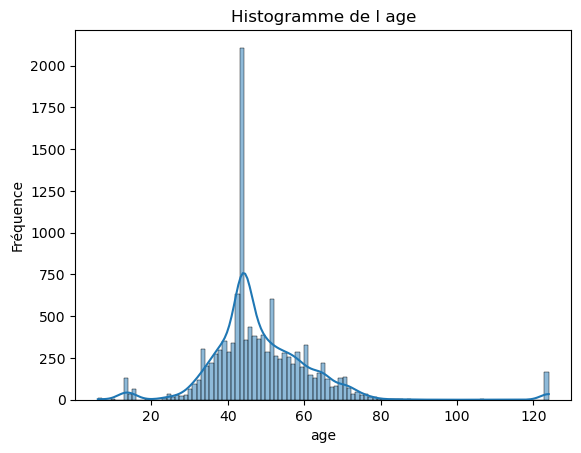

In [61]:
# Histogramme
plt.figure()
sns.histplot(train.age, kde=True)
plt.title('Histogramme de l age')
plt.xlabel('age')
plt.ylabel('Fréquence')
plt.show()

In [62]:
train=train[train['age']<80]
train=train[train['age']>20]
train.shape

(11754, 18)

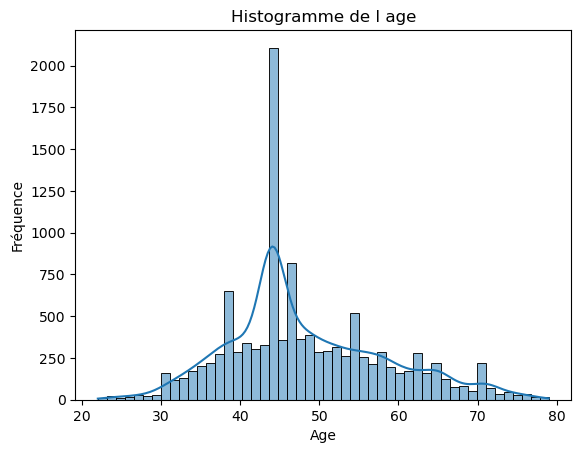

In [63]:
# Histogramme
plt.figure()
sns.histplot(train.age, kde=True)
plt.title('Histogramme de l age')
plt.xlabel('Age')
plt.ylabel('Fréquence')
plt.show()

# Autres variables

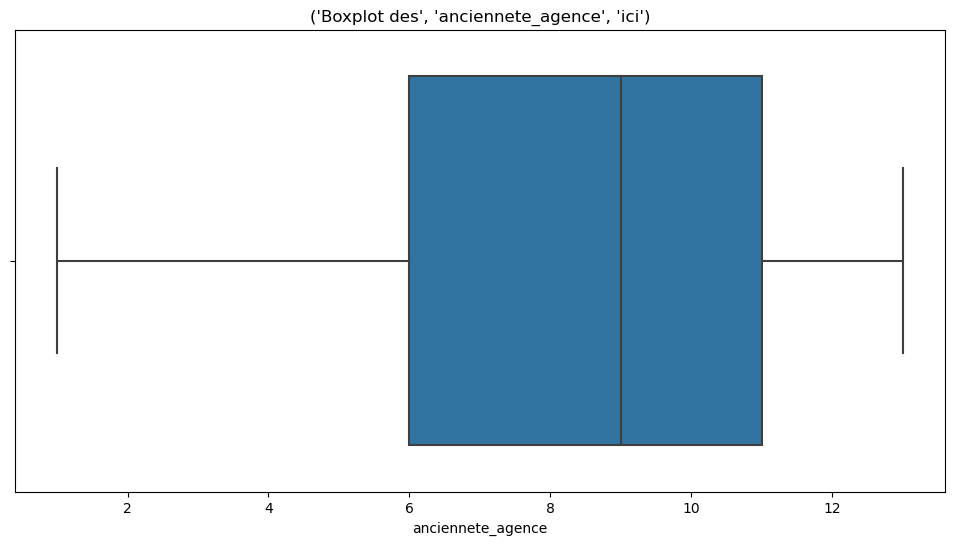

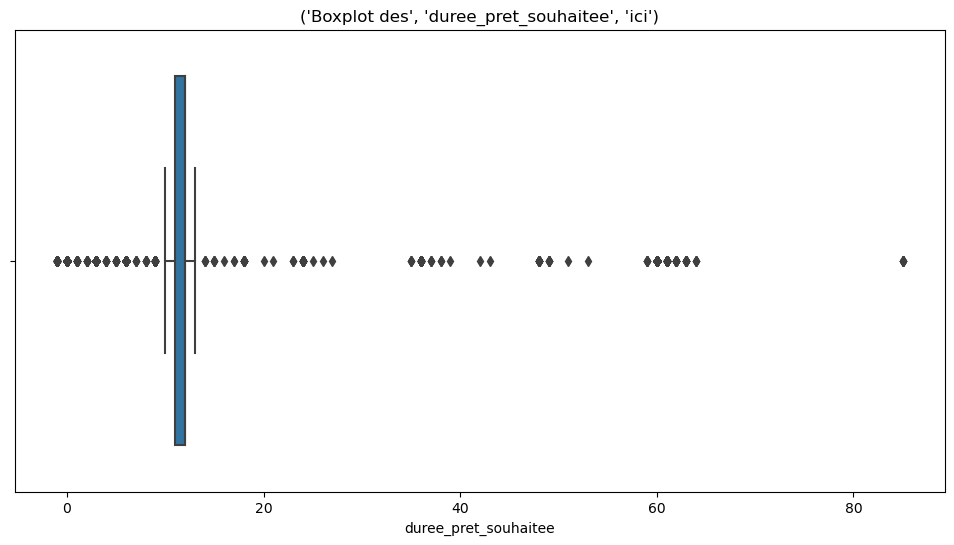

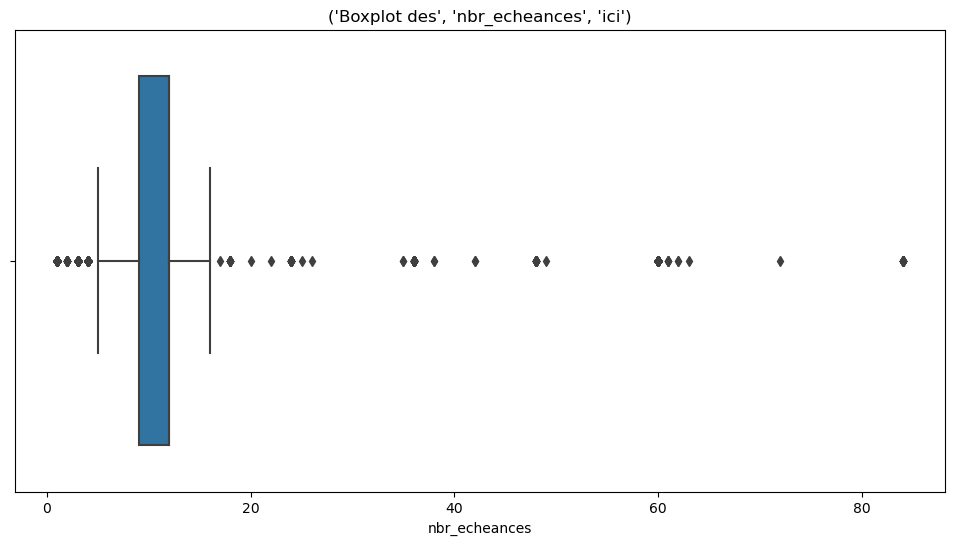

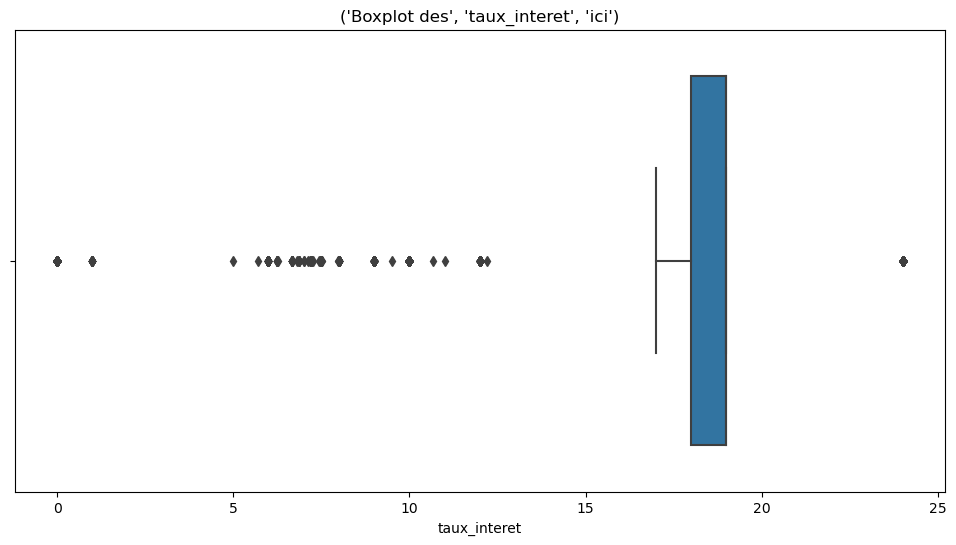

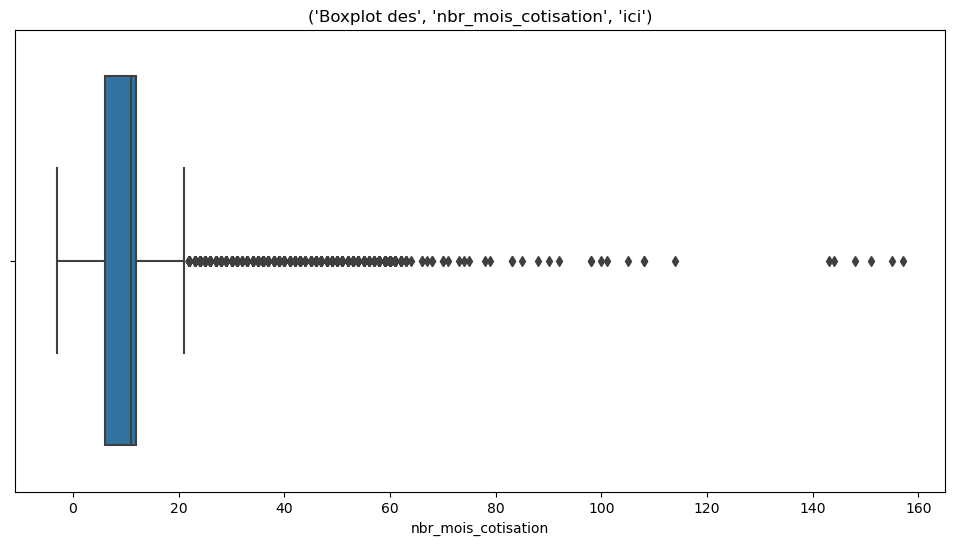

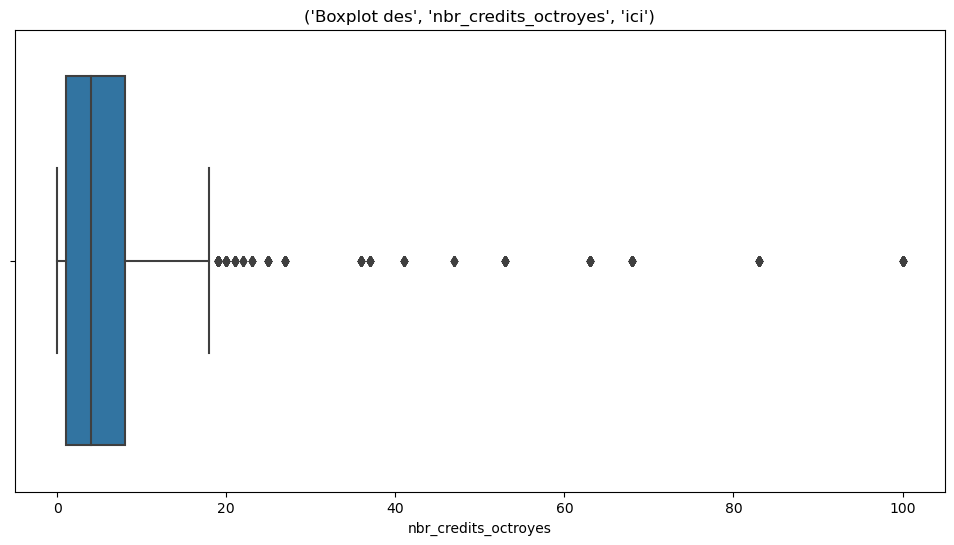

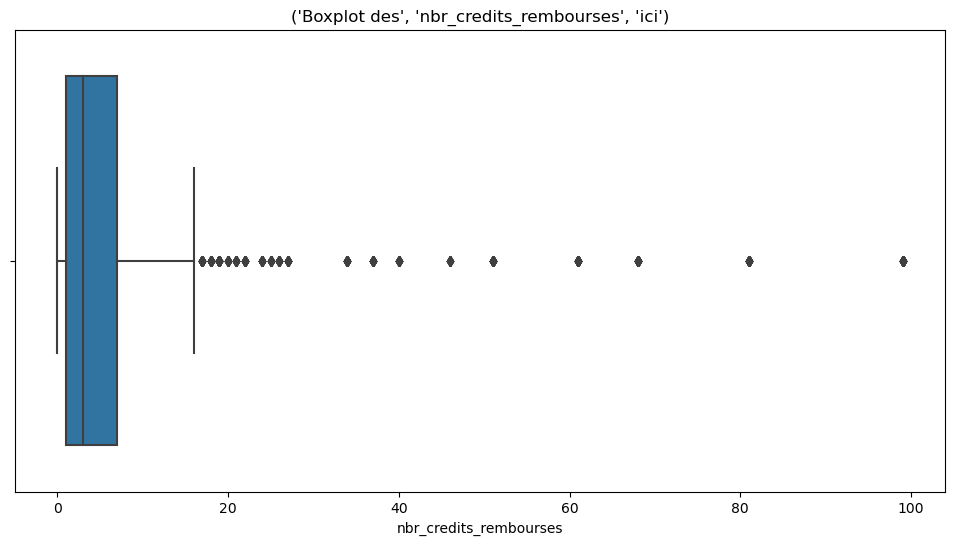

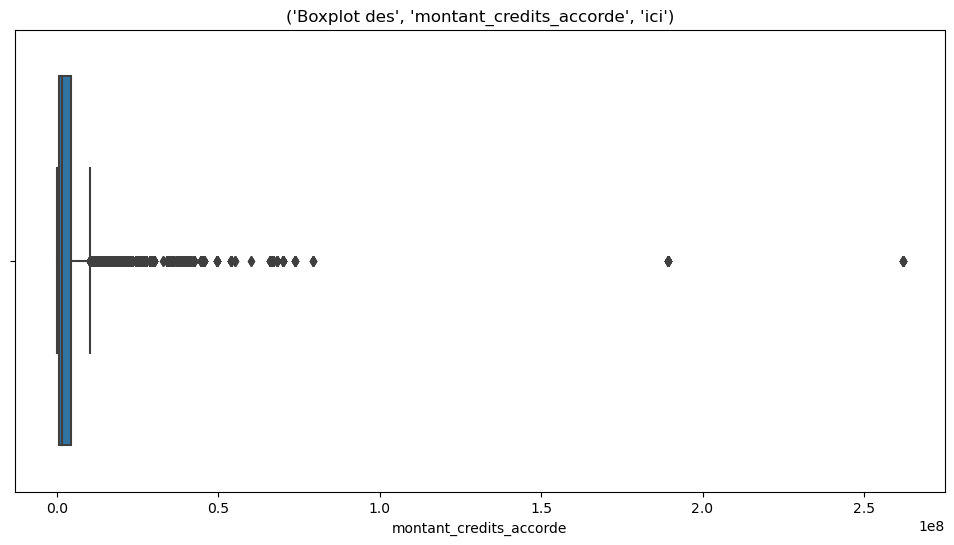

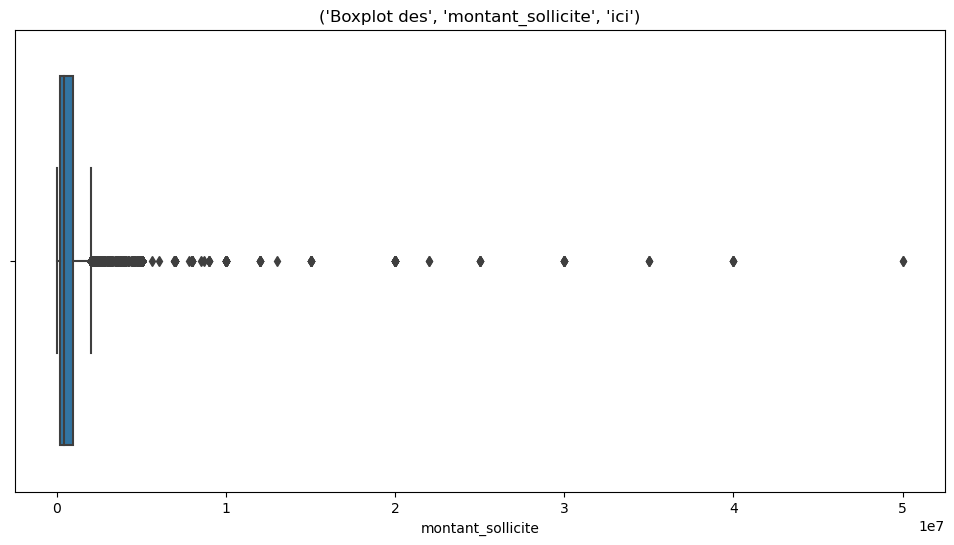

In [64]:
# Valeurs abérrante
# Visualiser les outliers en utilisant un boxplot avec Seaborn
#plus bas j'ai eu a constaté que 
autres = [
    'anciennete_agence',   
    'duree_pret_souhaitee', 
    'nbr_echeances', 
    'taux_interet',
    'nbr_mois_cotisation',
     'nbr_credits_octroyes', 
    'nbr_credits_rembourses',
       'montant_credits_accorde',
    'montant_sollicite',

]

for var in autres:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=train, x=var)
    plt.xlabel(var)
    name="Boxplot des", var, "ici"
    plt.title(name )
    plt.show()
    

# Voir ces valeurs aberante

In [65]:
train[train.nbr_credits_octroyes >40]

r         profession  age sexe  anciennete_agence  montant_sollicite  \
143    C      Fonctionnaire   65    M                NaN          1039000.0   
2457   C      Fonctionnaire   44    F               11.0          1170000.0   
2547   C      Fonctionnaire   65    M                NaN          1000000.0   
3083   C  Employé de bureau   44    M               11.0           120000.0   
3473   C      Fonctionnaire   65    M                NaN           105000.0   
...   ..                ...  ...  ...                ...                ...   
8506   C  Employé de bureau   71    M                9.0          3270000.0   
9889   C      Fonctionnaire   65    F                9.0          3440000.0   
13530  C      Fonctionnaire   65    F                9.0           300000.0   
13682  C  Employé de bureau   64    M                8.0            40000.0   
13769  C  Employé de bureau   44    M               11.0           279000.0   

       duree_pret_souhaitee  nbr_echeances  taux_interet  \
143                      36             36         12.00   
2457                     36             36          8.00   
2547                     36             36          8.00   
3083                     10             10         10.00   
3473                      9             10         10.00   
...                     ...            ...           ...   
8506                     36             36          6.67   
9889                     60             60          6.00   
13530                     9             10          9.00   
13682                    10             10          9.00   
13769                    10             10          9.00   

                 secteur_activite       ssecteur_activite  \
143                  CONSTRUCTION           Résidentielle   
2457                 CONSTRUCTION           Résidentielle   
2547                 CONSTRUCTION           Résidentielle   
3083   EDUCATION, ARTS ET CULTURE               EDUCATION   
3473                 CONSOMMATION  Mobiler/électroménager   
...                           ...                     ...   
8506                 CONSTRUCTION           Résidentielle   
9889                 CONSTRUCTION           Résidentielle   
13530  EDUCATION, ARTS ET CULTURE               EDUCATION   
13682                CONSOMMATION  Mobiler/électroménager   
13769                CONSOMMATION  Mobiler/électroménager   

       nbr_mois_cotisation  a_dette_encours  nbr_credits_octroyes  \
143                   36.0                0                    68   
2457                  35.0                0                    47   
2547                  36.0                0                    68   
3083                  10.0                0                    53   
3473                   9.0                0                    68   
...                    ...              ...                   ...   
8506                  36.0                1                   100   
9889                  55.0                1                    63   
13530                  4.0                1                    63   
13682                  4.0                1                    83   
13769                  2.0                1                    53   

       nbr_credits_rembourses  montant_credits_accorde  \
143                        68                4395000.0   
2457                       46                8130000.0   
2547                       68                4395000.0   
3083                       51               10154000.0   
3473                       68                4395000.0   
...                       ...                      ...   
8506                       99               15728000.0   
9889                       61               12340000.0   
13530                      61               12340000.0   
13682                      81               24485000.0   
13769                      51               10154000.0   

                date_fin_remboursement        date_dernier_remboursement  
143

In [66]:
train.columns

Index(['r', 'profession', 'age', 'sexe', 'anciennete_agence',
       'montant_sollicite', 'duree_pret_souhaitee', 'nbr_echeances',
       'taux_interet', 'secteur_activite', 'ssecteur_activite',
       'nbr_mois_cotisation', 'a_dette_encours', 'nbr_credits_octroyes',
       'nbr_credits_rembourses', 'montant_credits_accorde',
       'date_fin_remboursement', 'date_dernier_remboursement'],
      dtype='object')

In [67]:
# Identification des données aberrantes - IQR
# Fonction pour détecter les outliers en utilisant l'IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Trouver les outliers pour la colonne 'age'
outliers = detect_outliers_iqr(train, 'duree_pret_souhaitee')

# Afficher les outliers
print("Outliers détectés:")
#print(outliers)
outliers.shape
#outliers.age.unique()
A=outliers.montant_sollicite.unique()
outliers=pd.DataFrame(outliers.montant_sollicite)
outliers

Outliers détectés:


montant_sollicite
25              595000.0
26             1500000.0
33            10000000.0
34             1354000.0
35             2000000.0
...                  ...
13809           350000.0
13810           150000.0
13812           154000.0
13895            15000.0
13900           108000.0

[3253 rows x 1 columns]

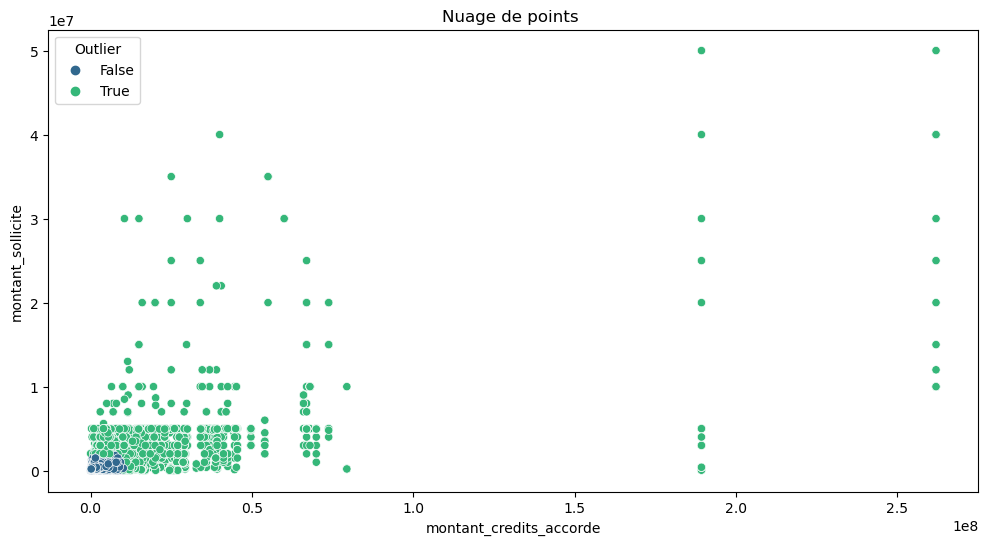

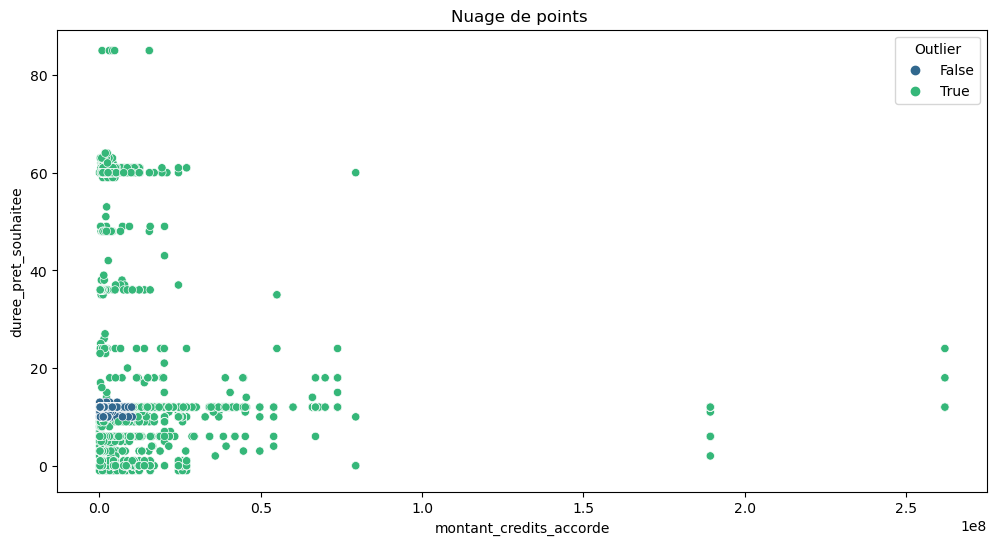

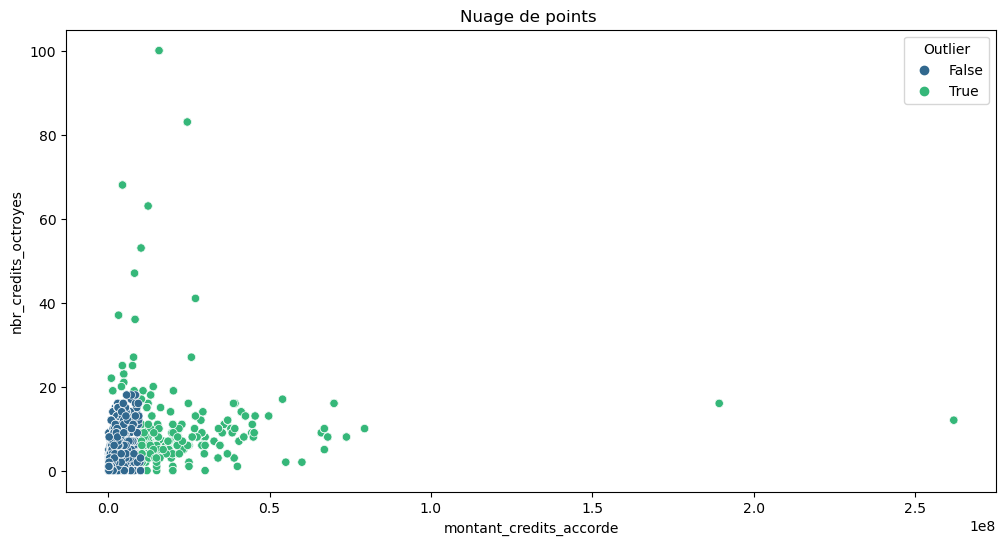

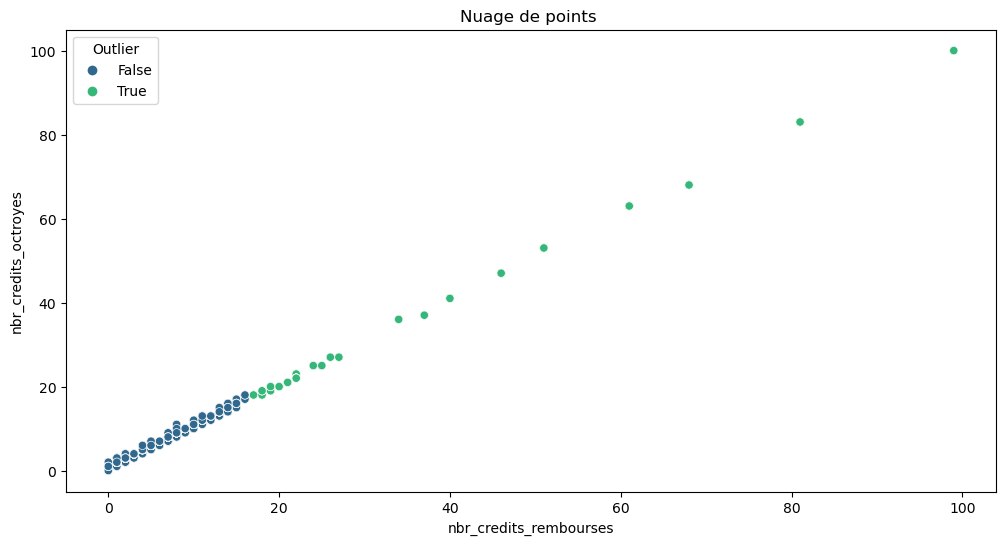

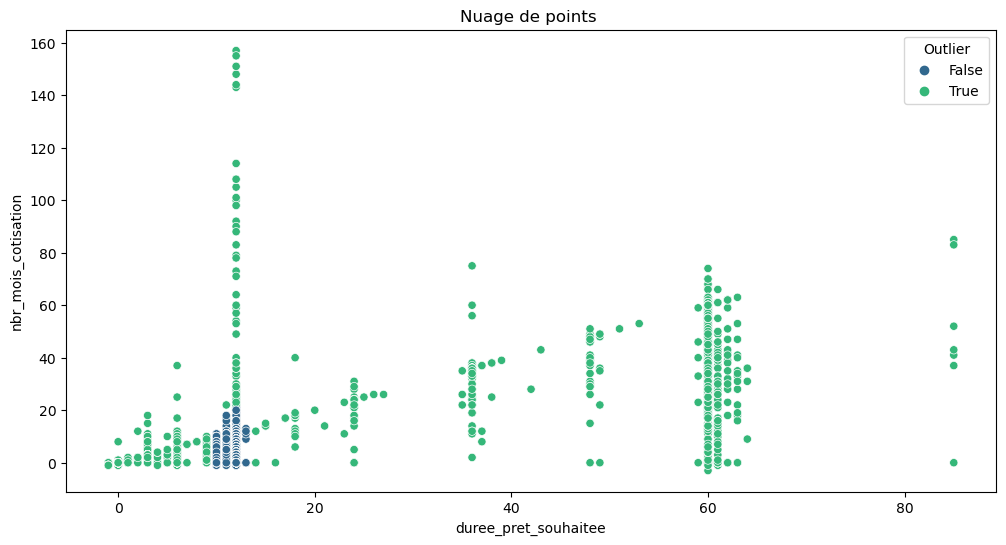

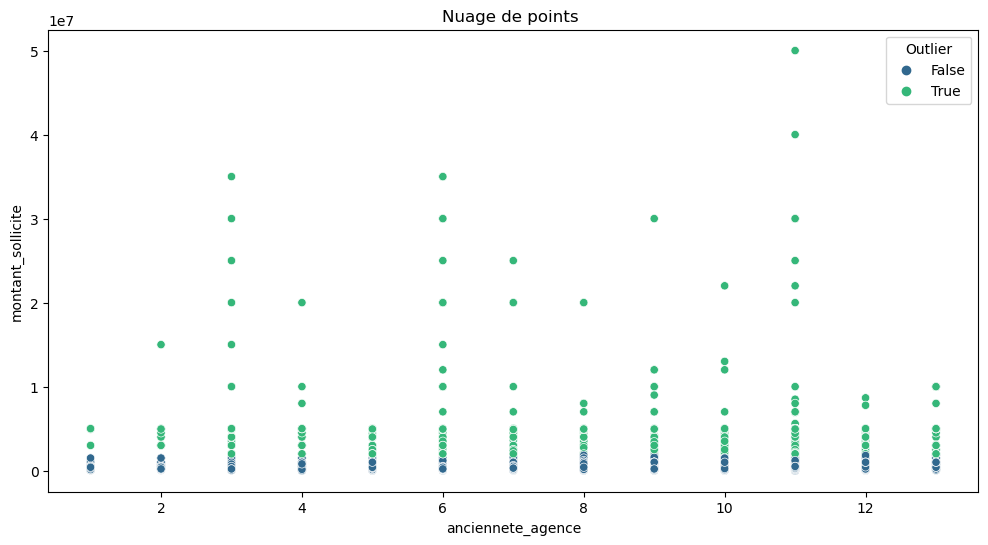

In [68]:
#Bivarié
variable_pairs = [('montant_sollicite','montant_credits_accorde'),('duree_pret_souhaitee','montant_credits_accorde'),('nbr_credits_octroyes','montant_credits_accorde'),('nbr_credits_octroyes',
       'nbr_credits_rembourses'),('nbr_mois_cotisation','duree_pret_souhaitee'),('montant_sollicite','anciennete_agence')]


for va, var in variable_pairs:
    data=train
    outliers_var = detect_outliers_iqr(data, var)
    outliers_va = detect_outliers_iqr(data, va)
     # Ajouter une colonne pour indiquer si la valeur est extrême
    data['Outlier'] = False
    data.loc[outliers_var.index, 'Outlier'] = True
    data.loc[outliers_va.index, 'Outlier'] = True
    # Créer un nuage de points (scatter plot) avec Seaborn en mettant en évidence les valeurs extrêmes
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=data, x= var, y= va, hue='Outlier', palette='viridis')
    plt.xlabel(var)
    plt.ylabel(va)
    plt.title("Nuage de points ")
    plt.show()



In [69]:
#train=train[train.Outlier == True]


Montant_sollicite ----Montant_accorde :Normale
duree_pret_souhaitee ----Montant_accorde :Normale
nbr_credits_octroyes----Montant_accorde :Normale
accorde------rembouser


In [70]:
train=train.drop("Outlier",axis=1)

# 2-Non symetrique



L'Isolation Forest est une méthode d'apprentissage automatique non supervisée pour identifier les valeurs aberrantes dans des données univariées et multivariées. **Elle fonctionne en construisant plusieurs arbres de décision aléatoires** et en calculant un score d'anomalie pour chaque observation en fonction de la profondeur moyenne à laquelle elle est isolée des autres observations.

### Définition

**L'Isolation Forest est basée sur l'idée que les valeurs aberrantes sont plus faciles à isoler que les valeurs normales**. Elle construit plusieurs arbres de décision aléatoires et divise les données en sous-ensembles aléatoires à chaque nœud. L'algorithme isole les observations en fonction de la profondeur moyenne à laquelle elles sont isolées par rapport aux autres observations. Les observations qui sont isolées plus rapidement que la moyenne sont considérées comme des valeurs aberrantes.

### Avantages

**L'Isolation Forest est capable de détecter les valeurs aberrantes dans des données univariées et multivariées**. Elle fonctionne également bien avec des **distributions non symétriques** et est assez robuste aux valeurs aberrantes. 


### Inconvénients

L'Isolation Forest peut être sensible aux paramètres tels que le nombre d'arbres et la taille des sous-échantillons. De plus, elle peut parfois être difficile à interpréter, en particulier pour les données multivariées.


In [71]:
train.shape

(11754, 18)

# 2-2 Valeurs manquantes

In [72]:
train.isnull().sum()

r                                0
profession                       0
age                              0
sexe                             0
anciennete_agence             3532
montant_sollicite                0
duree_pret_souhaitee             0
nbr_echeances                    0
taux_interet                     0
secteur_activite                 0
ssecteur_activite                0
nbr_mois_cotisation            286
a_dette_encours                  0
nbr_credits_octroyes             0
nbr_credits_rembourses           0
montant_credits_accorde          0
date_fin_remboursement           0
date_dernier_remboursement       0
dtype: int64

In [73]:
#Variable quantitative
train.anciennete_agence.value_counts()

11.0    1078
12.0    1037
9.0      974
10.0     884
6.0      861
5.0      804
8.0      666
7.0      548
4.0      527
3.0      337
13.0     283
2.0      170
1.0       53
Name: anciennete_agence, dtype: int64

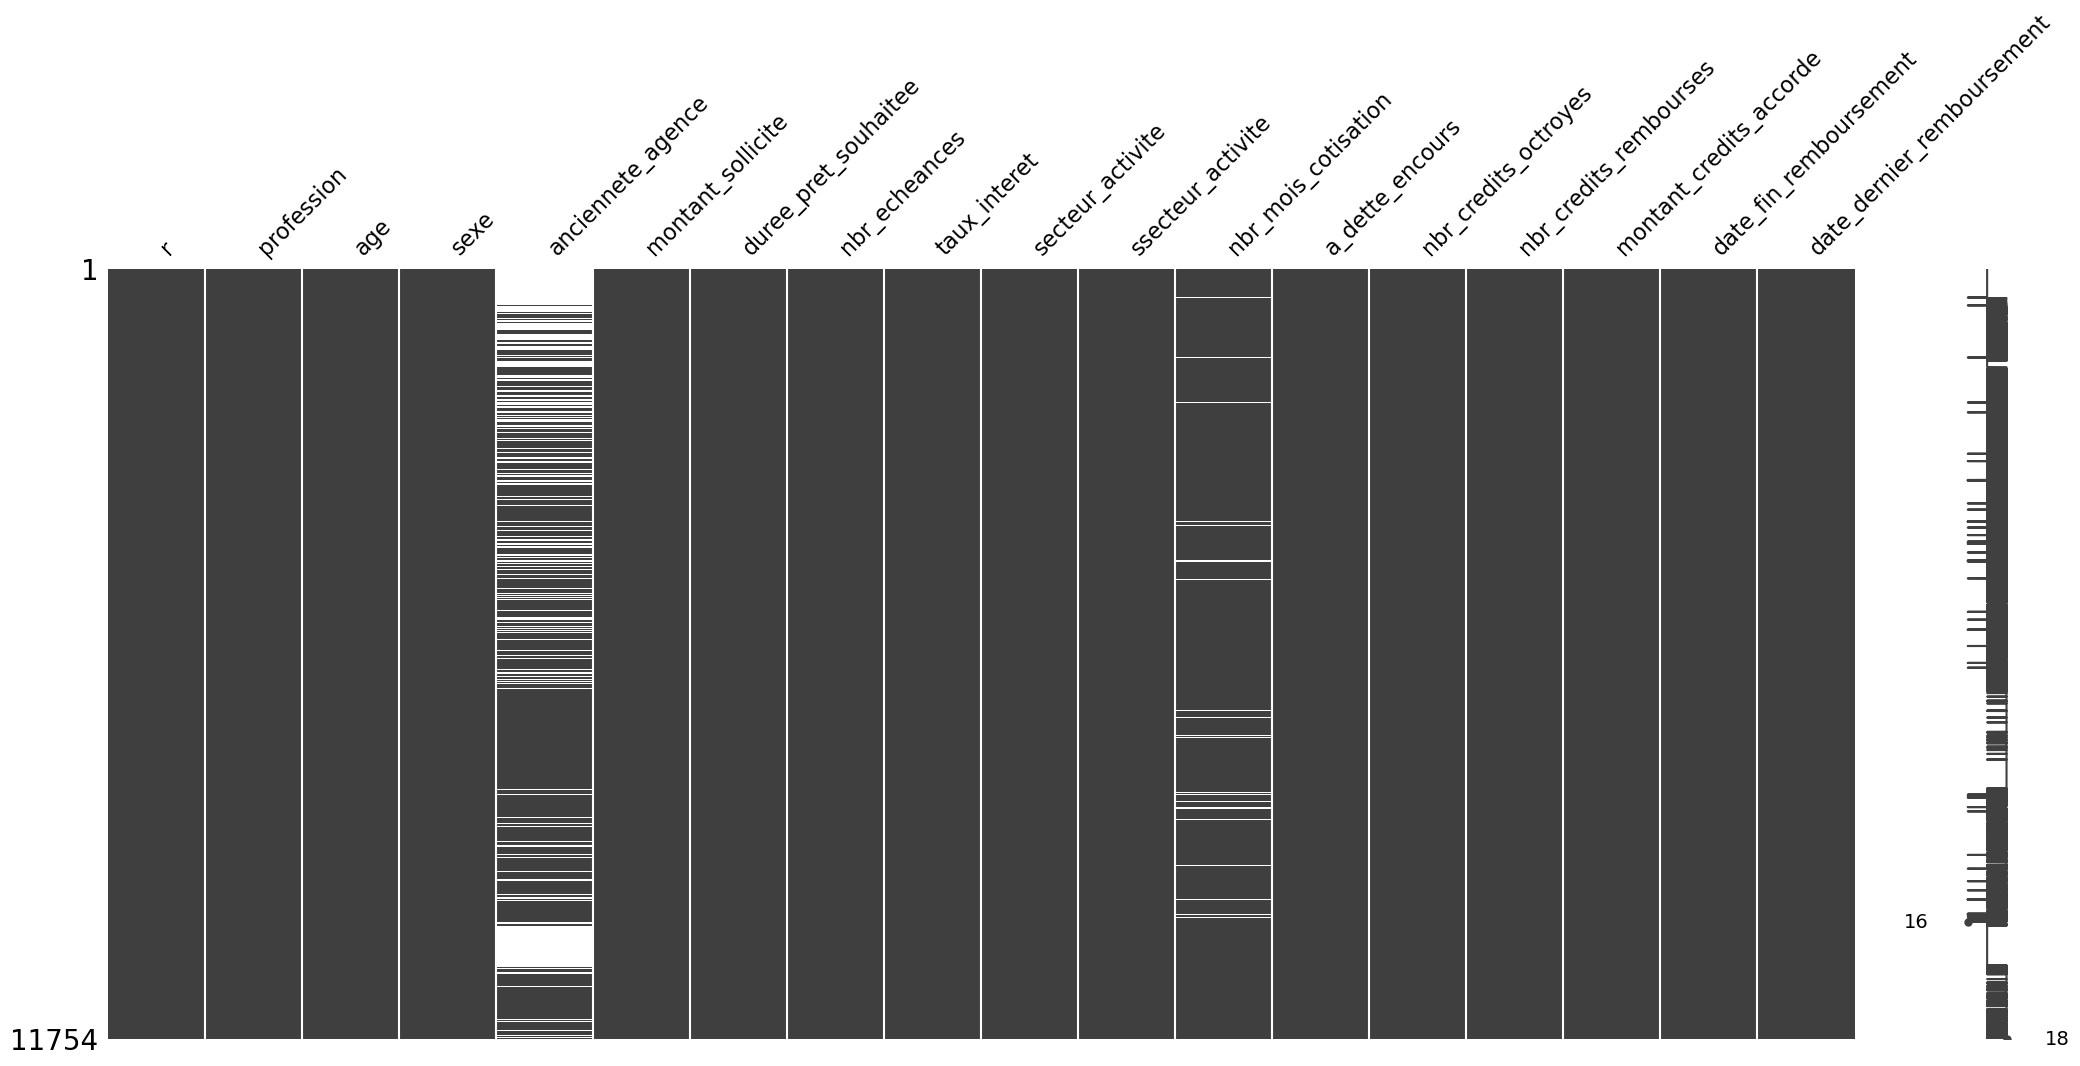

In [74]:
import missingno as msno
# Visualiser les valeurs manquantes avec missingno
msno.matrix(train)
plt.show()

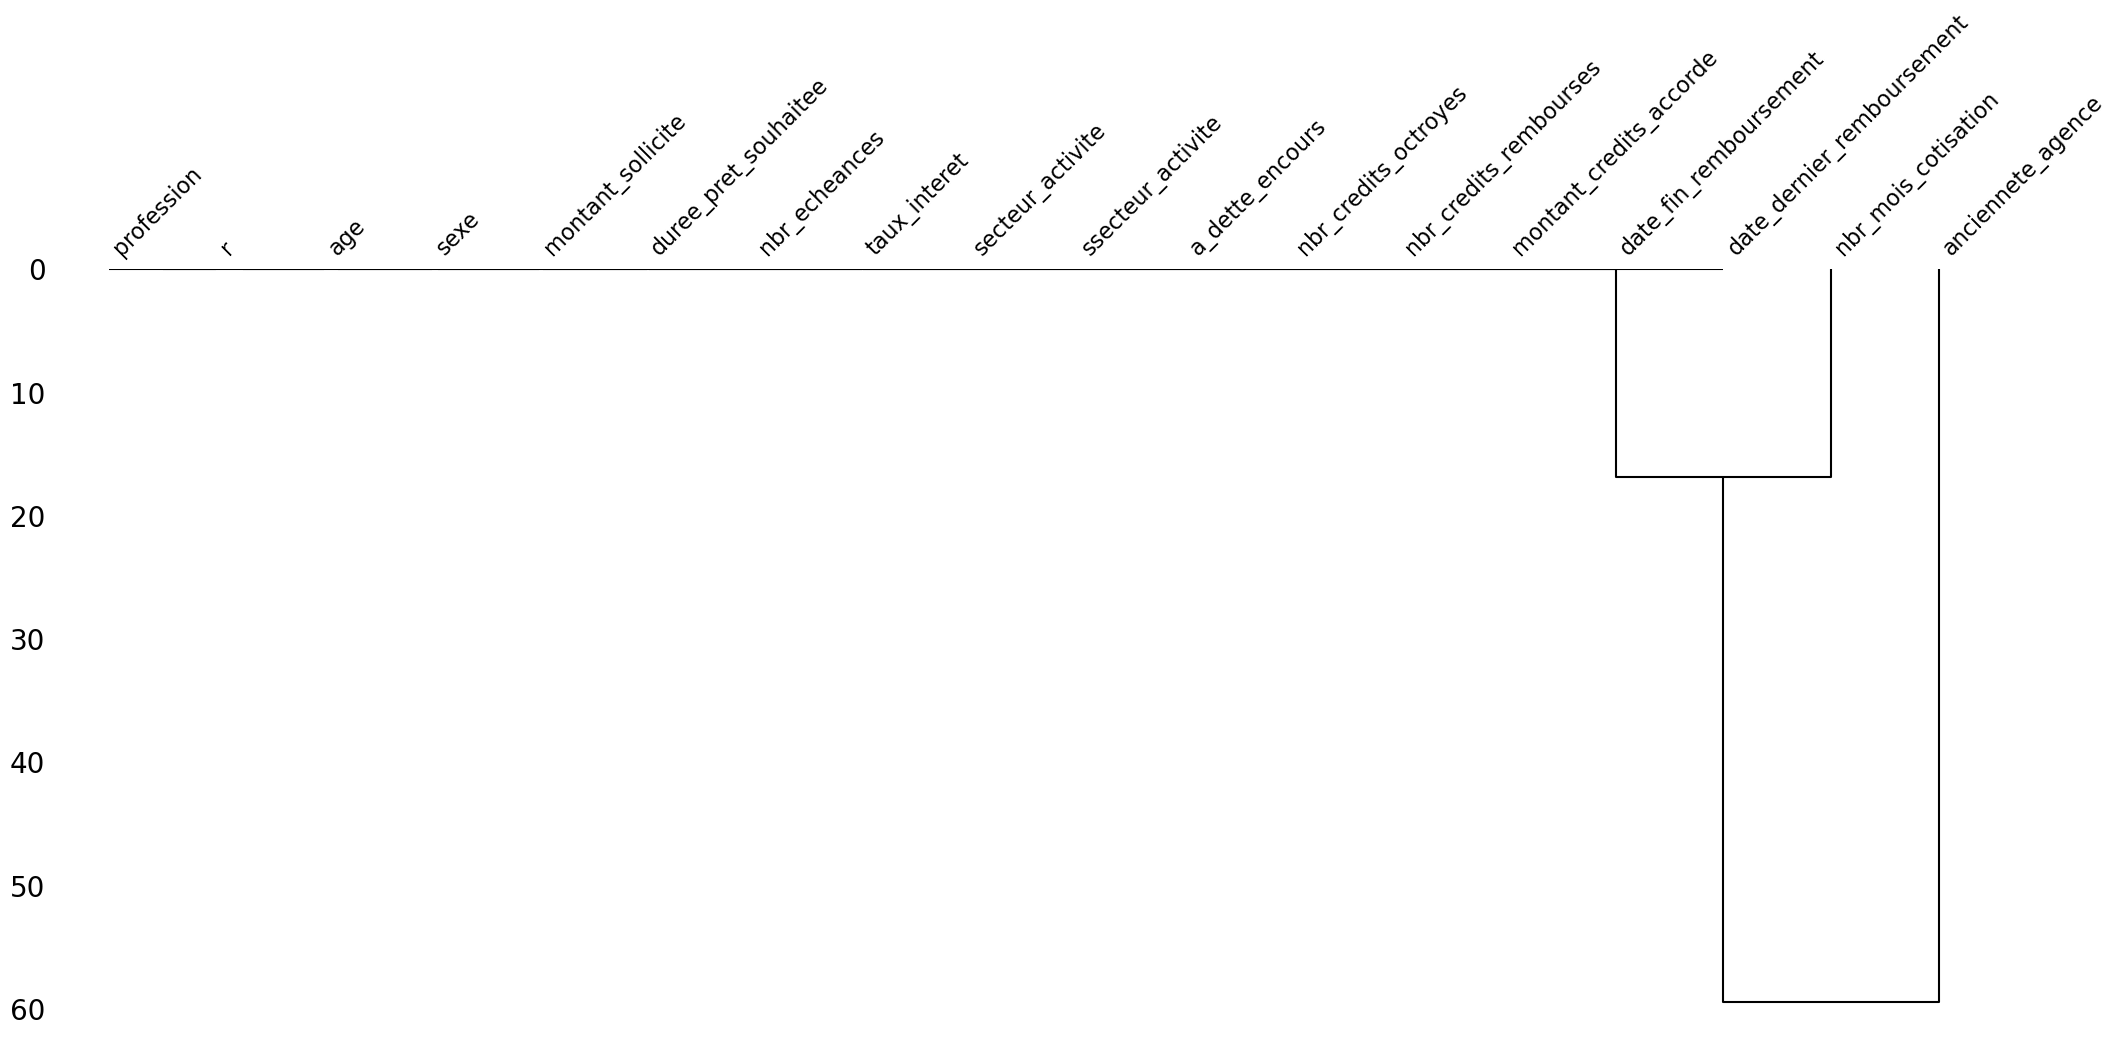

In [75]:
msno.dendrogram(train)
plt.show()

<AxesSubplot:>

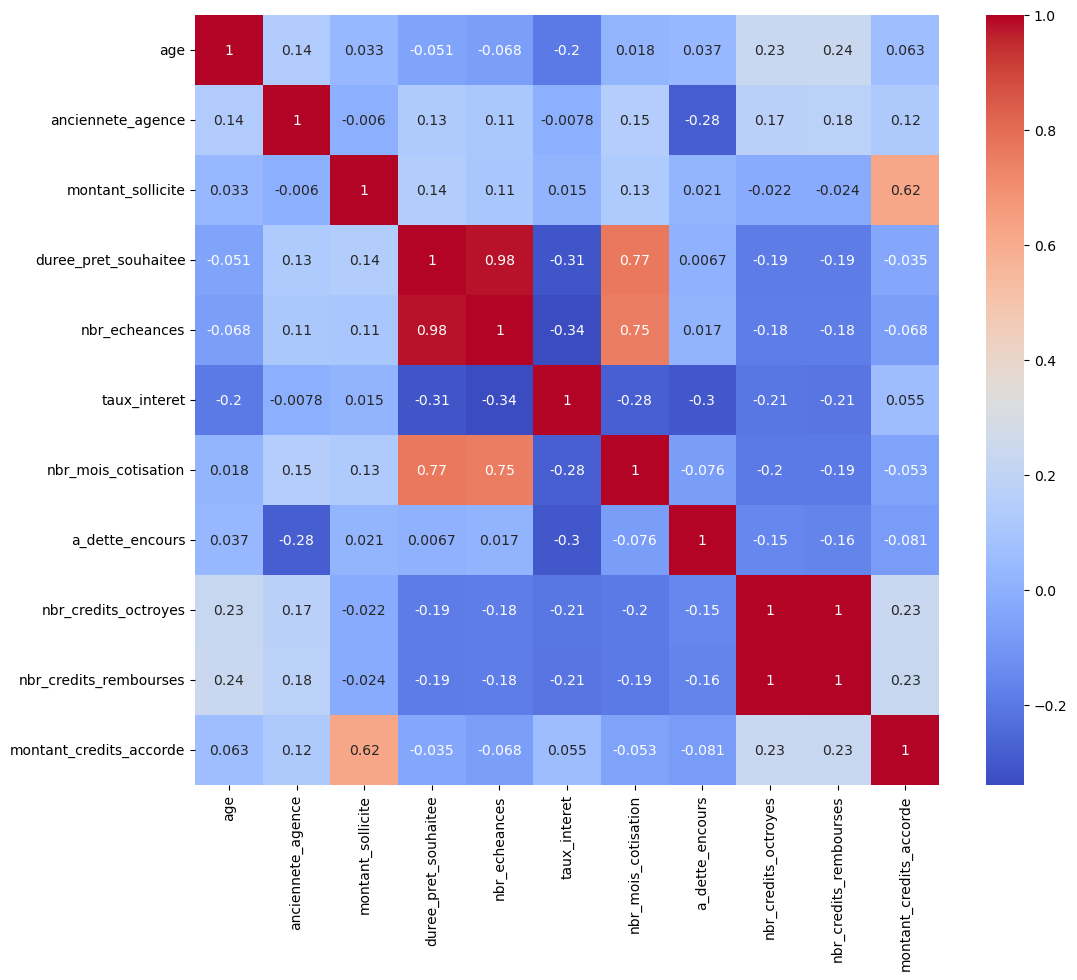

In [76]:
corr_matrix=train.corr()
plt.figure(figsize=(12, 10))
# Affichage de la matrice de corrélation sous forme de heatmap avec seaborn
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

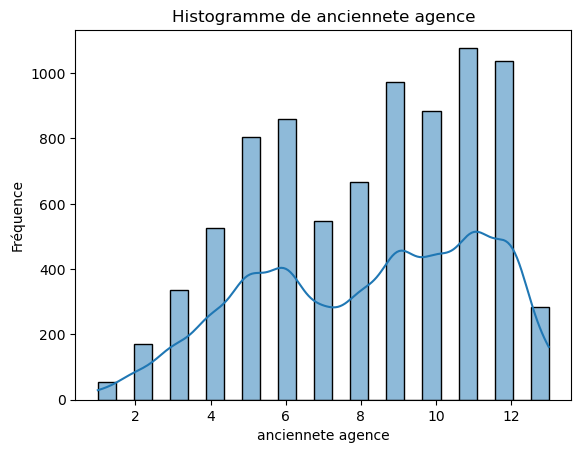

In [77]:
# Histogramme
plt.figure()
sns.histplot(train.anciennete_agence, kde=True)
plt.title('Histogramme de anciennete agence')
plt.xlabel('anciennete agence')
plt.ylabel('Fréquence')
plt.show()


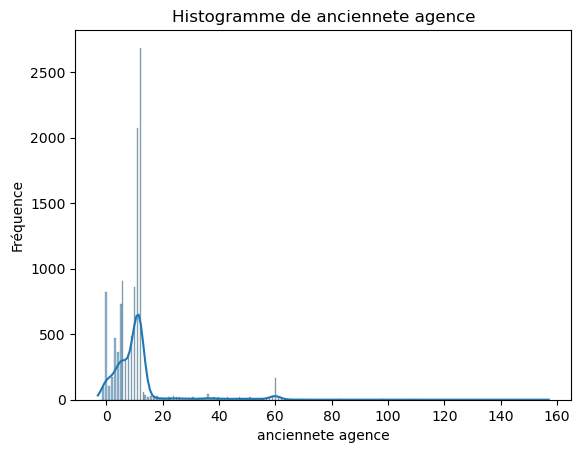

In [78]:
# Histogramme
plt.figure()
sns.histplot(train.nbr_mois_cotisation , kde=True)
plt.title('Histogramme de anciennete agence')
plt.xlabel('anciennete agence')
plt.ylabel('Fréquence')
plt.show()

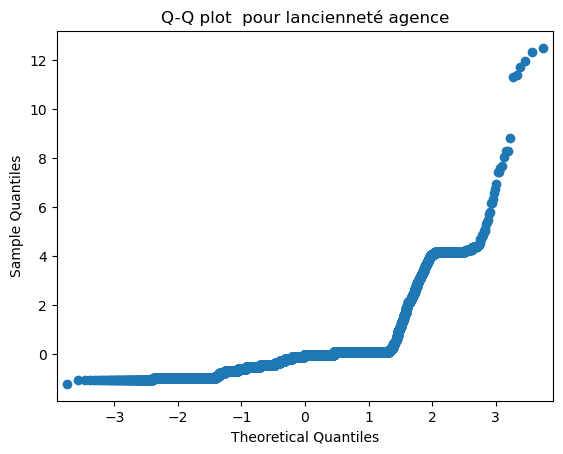

In [79]:
import statsmodels.api as sm
coti=train.nbr_mois_cotisation.dropna()
fig = sm.qqplot(coti, fit=True)
plt.title('Q-Q plot  pour lancienneté agence')
plt.show()

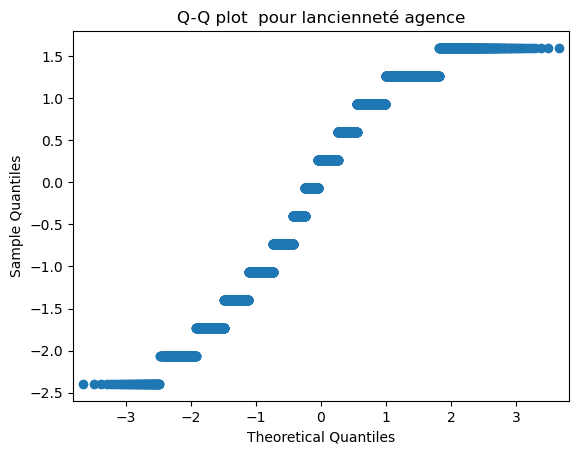

In [80]:
agen=train.anciennete_agence.dropna()
fig = sm.qqplot(agen, fit=True)
plt.title('Q-Q plot  pour lancienneté agence')
plt.show()

In [81]:
from statsmodels.stats.diagnostic import lilliefors
from scipy import stats
sepal_length =coti
#sepal_length = agen
# Niveau de signification (alpha)
alpha = 0.05

# Effectuer les tests de normalité
shapiro_test = stats.shapiro(sepal_length)
ks_test = stats.kstest(sepal_length, 'norm')
ad_test = stats.anderson(sepal_length, dist='norm')
dagostino_test = stats.normaltest(sepal_length)
lilliefors_test = lilliefors(sepal_length, dist='norm')

# Créer un tableau pandas avec les résultats des tests
test_results = pd.DataFrame({
    'Nom du test': ['Shapiro-Wilk', 'Kolmogorov-Smirnov', 'Anderson-Darling', "D'Agostino-Pearson", 'Lilliefors'],
    'Statistique de test': [shapiro_test[0], ks_test.statistic, ad_test.statistic, dagostino_test.statistic, lilliefors_test[0]],
    'p-valeur': [shapiro_test[1], ks_test.pvalue, None, dagostino_test.pvalue, lilliefors_test[1]],
    'Normalité': ['Oui' if shapiro_test[1] > alpha else 'Non',
                  'Oui' if ks_test.pvalue > alpha else 'Non',
                  'Oui' if any(ad_test.statistic < crit_val for crit_val in ad_test.critical_values) else 'Non',
                  'Oui' if dagostino_test.pvalue > alpha else 'Non',
                  'Oui' if lilliefors_test[1] > alpha else 'Non']
})

print(test_results)

          Nom du test  Statistique de test  p-valeur Normalité
0        Shapiro-Wilk             0.580843     0.000       Non
1  Kolmogorov-Smirnov             0.894273     0.000       Non
2    Anderson-Darling          1449.271749       NaN       Non
3  D'Agostino-Pearson          9328.793916     0.000       Non
4          Lilliefors             0.377193     0.001       Non


C:\Users\HOME\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [82]:
from statsmodels.stats.diagnostic import lilliefors
from scipy import stats
sepal_length =agen
#sepal_length = agen
# Niveau de signification (alpha)
alpha = 0.05

# Effectuer les tests de normalité
shapiro_test = stats.shapiro(sepal_length)
ks_test = stats.kstest(sepal_length, 'norm')
ad_test = stats.anderson(sepal_length, dist='norm')
dagostino_test = stats.normaltest(sepal_length)
lilliefors_test = lilliefors(sepal_length, dist='norm')

# Créer un tableau pandas avec les résultats des tests
test_results = pd.DataFrame({
    'Nom du test': ['Shapiro-Wilk', 'Kolmogorov-Smirnov', 'Anderson-Darling', "D'Agostino-Pearson", 'Lilliefors'],
    'Statistique de test': [shapiro_test[0], ks_test.statistic, ad_test.statistic, dagostino_test.statistic, lilliefors_test[0]],
    'p-valeur': [shapiro_test[1], ks_test.pvalue, None, dagostino_test.pvalue, lilliefors_test[1]],
    'Normalité': ['Oui' if shapiro_test[1] > alpha else 'Non',
                  'Oui' if ks_test.pvalue > alpha else 'Non',
                  'Oui' if any(ad_test.statistic < crit_val for crit_val in ad_test.critical_values) else 'Non',
                  'Oui' if dagostino_test.pvalue > alpha else 'Non',
                  'Oui' if lilliefors_test[1] > alpha else 'Non']
})

print(test_results)

          Nom du test  Statistique de test  p-valeur Normalité
0        Shapiro-Wilk             0.948582     0.000       Non
1  Kolmogorov-Smirnov             0.971528     0.000       Non
2    Anderson-Darling           142.074571       NaN       Non
3  D'Agostino-Pearson          1865.805007     0.000       Non
4          Lilliefors             0.124060     0.001       Non


C:\Users\HOME\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [83]:
 #Exemple d'imputation par la médiane
#median_anciennete = train['anciennete_agence'].mean()
#median_anciennet = train['nbr_mois_cotisation'].mean()
#train['nbr_mois_cotisation'] = train['nbr_mois_cotisation'].fillna(median_anciennet)
#train['anciennete_agence'] = train['anciennete_agence'].fillna(median_anciennete)


In [84]:
#On devrait juste emputer anciennete puisue 30 % mais c'est une variable importante dans la sélection métier
from sklearn.impute import MissingIndicator, KNNImputer,SimpleImputer
# Imputation par KNN Imputer
# KNN imputer avec 3 voisins pour plusieurs colonnes
imputer = KNNImputer(n_neighbors=3)
train['duree_pret_souhaitee'] = imputer.fit_transform(train[['duree_pret_souhaitee']])
train[['nbr_mois_cotisation']] = imputer.fit_transform(train[['nbr_mois_cotisation']])
train[['anciennete_agence']] = imputer.fit_transform(train[['anciennete_agence']])
train.isnull().mean()

r                             0.0
profession                    0.0
age                           0.0
sexe                          0.0
anciennete_agence             0.0
montant_sollicite             0.0
duree_pret_souhaitee          0.0
nbr_echeances                 0.0
taux_interet                  0.0
secteur_activite              0.0
ssecteur_activite             0.0
nbr_mois_cotisation           0.0
a_dette_encours               0.0
nbr_credits_octroyes          0.0
nbr_credits_rembourses        0.0
montant_credits_accorde       0.0
date_fin_remboursement        0.0
date_dernier_remboursement    0.0
dtype: float64

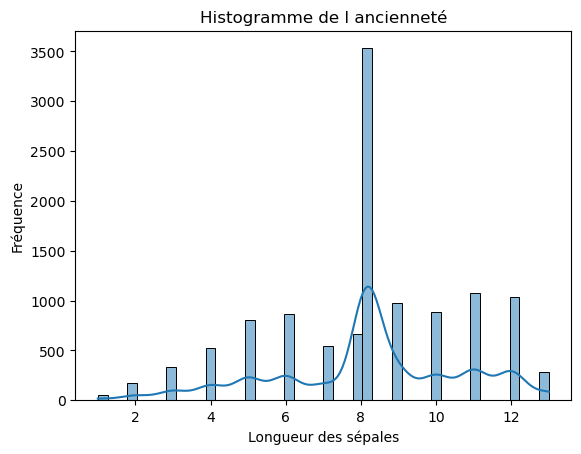

In [85]:
# Histogramme
plt.figure()
#sns.histplot(train.nbr_mois_cotisation, kde=True)
sns.histplot(train.anciennete_agence, kde=True)
plt.title('Histogramme de l ancienneté' )
plt.xlabel('Longueur des sépales')
plt.ylabel('Fréquence')
plt.show()


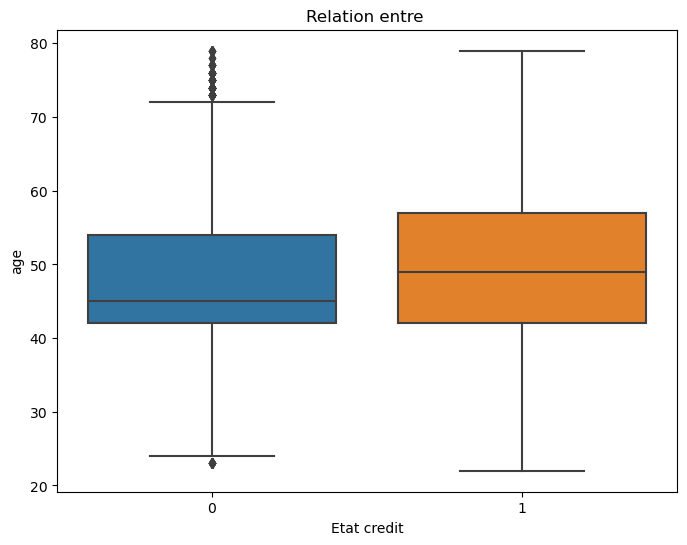

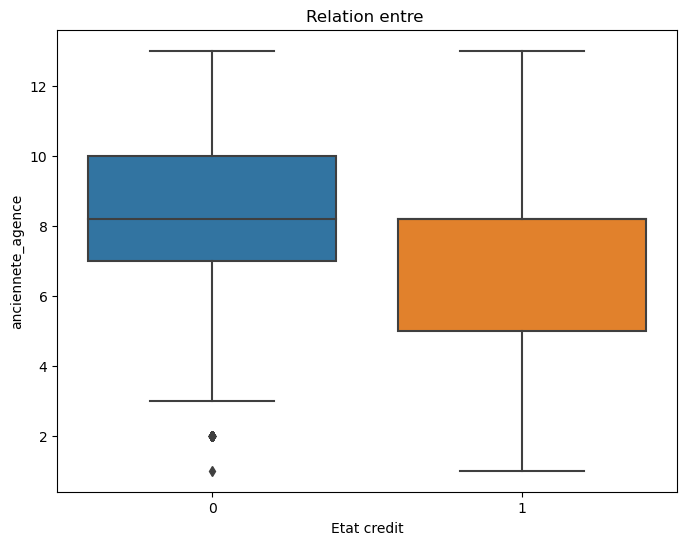

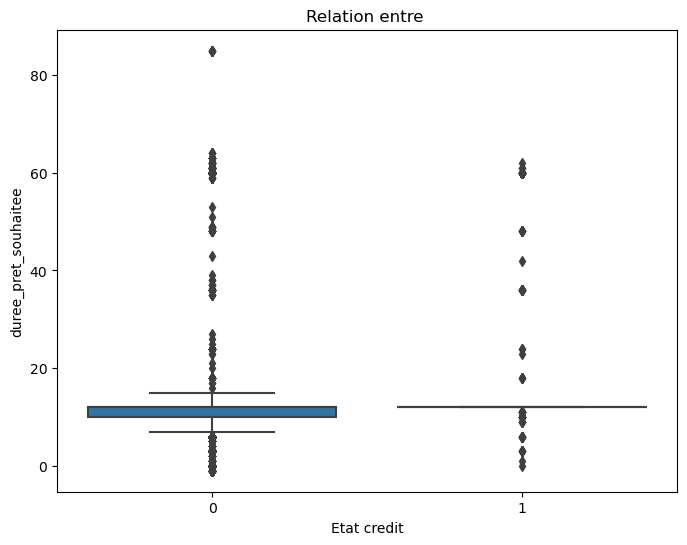

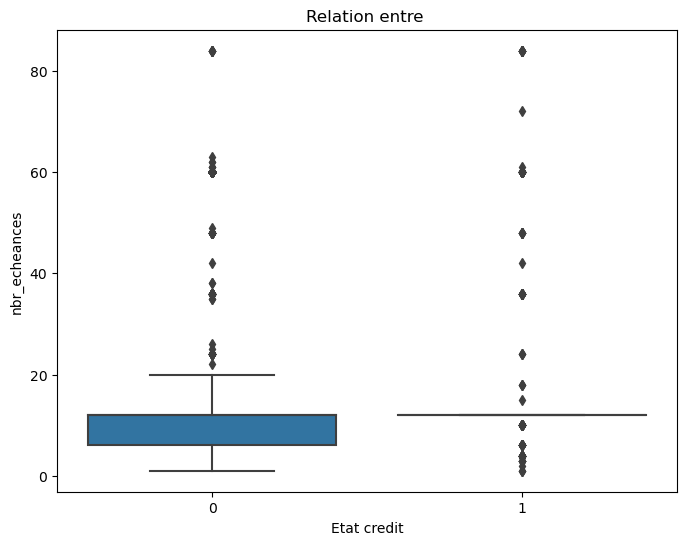

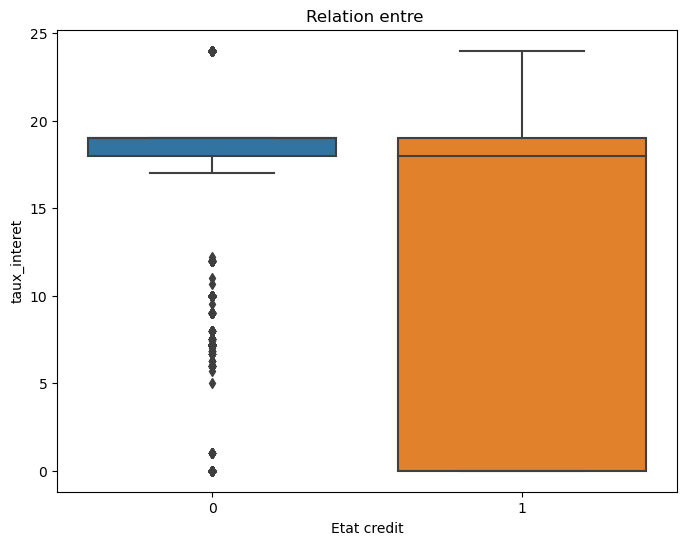

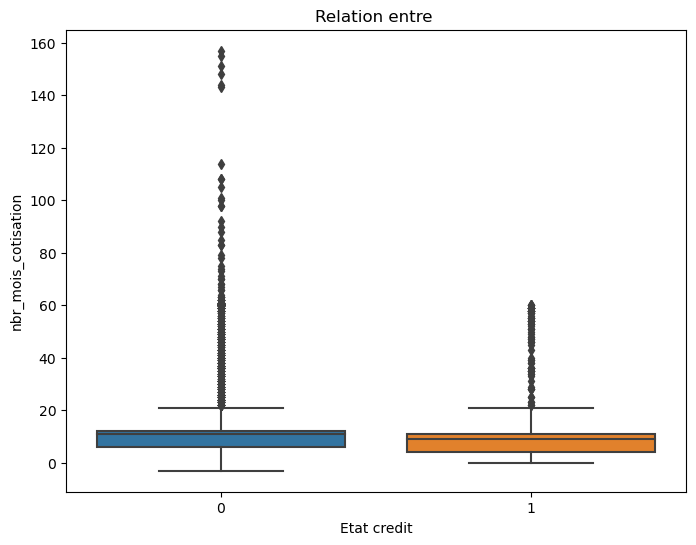

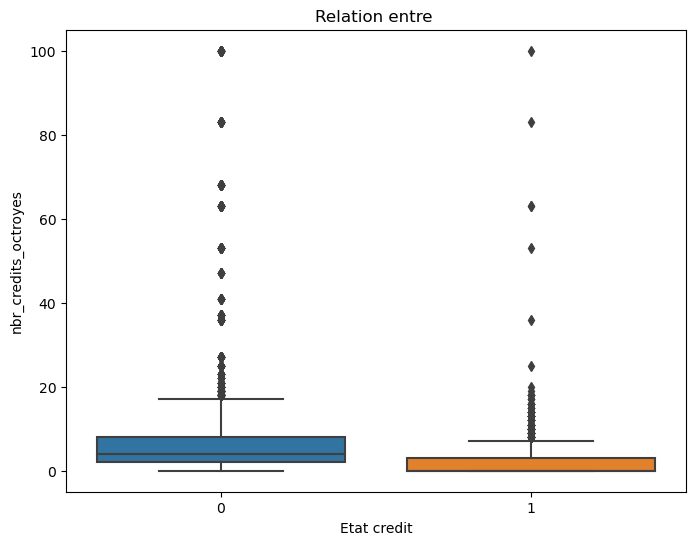

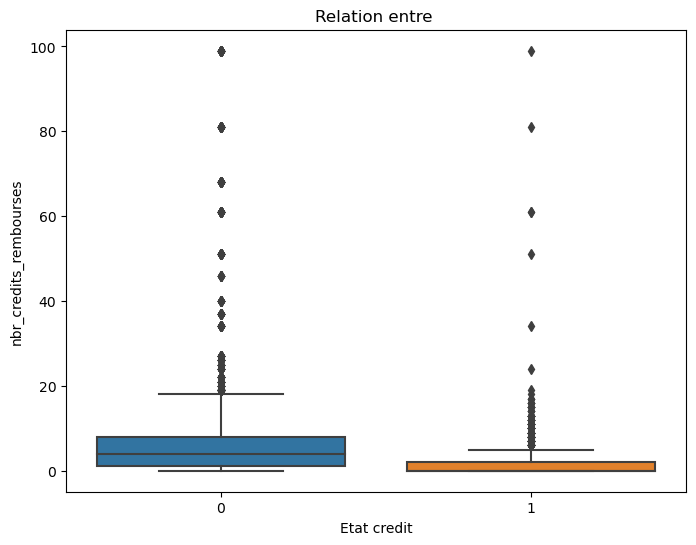

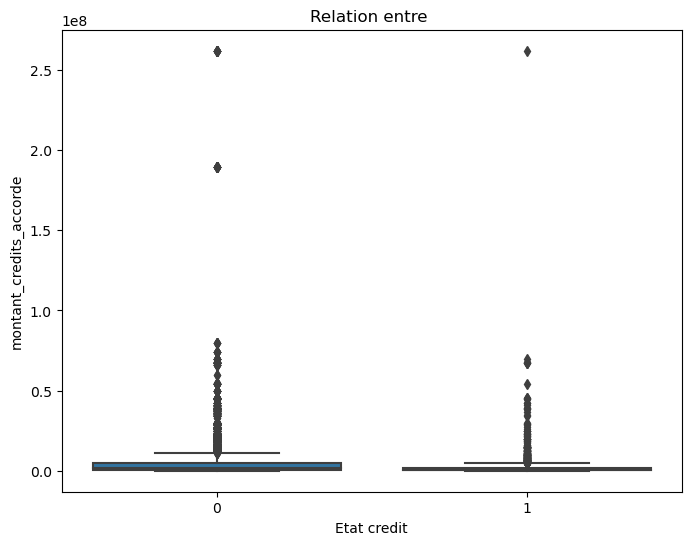

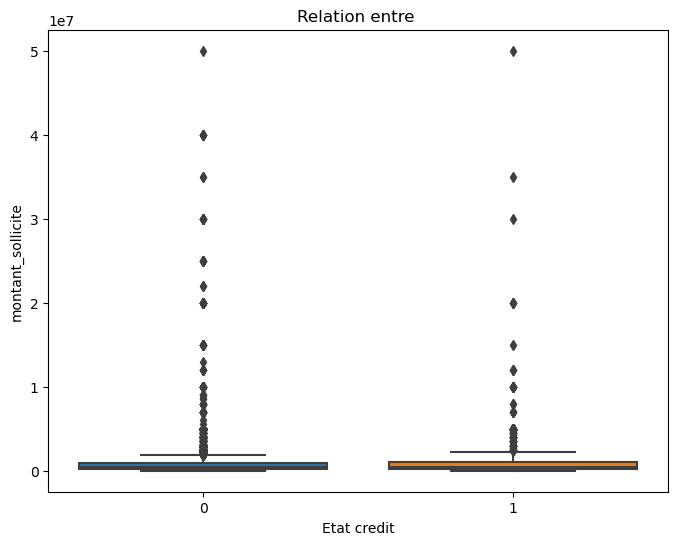

In [86]:
#plus bas j'ai eu a constaté que 
variables_quan = [ 
    'age', 
    'anciennete_agence',  
    'duree_pret_souhaitee', 
    'nbr_echeances', 
    'taux_interet',
    'nbr_mois_cotisation',
     'nbr_credits_octroyes', 
    'nbr_credits_rembourses',
       'montant_credits_accorde',
    'montant_sollicite'
]

# Créer un boxplot de la relation entre
for ind in variables_quan:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=train, x='a_dette_encours', y=ind)
    plt.xlabel('Etat credit')
    plt.ylabel(ind)
    plt.title('Relation entre ')
    plt.show()

# Encodage

In [87]:
val_quali=['r', 'profession', 'sexe','secteur_activite','ssecteur_activite']

In [88]:
from sklearn.preprocessing import (LabelEncoder, OrdinalEncoder, OneHotEncoder,
                                    LabelBinarizer, MultiLabelBinarizer)

In [89]:
# Label encoding
la = LabelEncoder()
train['r'] = la.fit_transform(train['r'])
    

In [90]:
# Afficher les mappings

mappings = dict(zip(la.classes_, la.transform(la.classes_)))
print(mappings)


{'C': 0, 'D': 1, 'O': 2, 'S': 3, 'V': 4}


In [91]:
# Label encoding
label_encoder = LabelEncoder()
for bal in val_quali:
    train[bal] = label_encoder.fit_transform(train[bal])
    


In [92]:

# One-hot encoding
#ohe = OneHotEncoder(sparse=False)
#ohe_result = ohe.fit_transform(train[['r']])
#df_ohe = pd.DataFrame(ohe_result, columns=ohe.get_feature_names(['r']))
#print("One-hot encoding : ")
#print(df_ohe)

In [93]:
#train.reset_index(drop=True,inplace=True)
#train=pd.get_dummies(train,columns=['secteur_activite'])
#train=pd.get_dummies(train,columns=['r'])

In [94]:
train=train.drop('date_fin_remboursement',axis=1)
train=train.drop('date_dernier_remboursement',axis=1)


# Selection variables

In [95]:
from sklearn.feature_selection import VarianceThreshold
# Appliquer le seuil de variance
threshold = 0.8 * (1 - 0.8)  # Exemple de seuil, à adapter selon les besoins
selector = VarianceThreshold(threshold=threshold)
X_high_variance = selector.fit_transform(train)
columns = train.columns
# Afficher les caractéristiques sélectionnées
selected_columns = columns[selector.get_support()]
print(f"Caractéristiques sélectionnées : {selected_columns}")

Caractéristiques sélectionnées : Index(['r', 'profession', 'age', 'sexe', 'anciennete_agence',
       'montant_sollicite', 'duree_pret_souhaitee', 'nbr_echeances',
       'taux_interet', 'secteur_activite', 'ssecteur_activite',
       'nbr_mois_cotisation', 'nbr_credits_octroyes', 'nbr_credits_rembourses',
       'montant_credits_accorde'],
      dtype='object')


In [96]:
from sklearn.feature_selection import SelectKBest, f_classif

In [97]:
from scipy.stats import kruskal
X=train.drop('a_dette_encours',axis=1)
y=train.a_dette_encours
# Sélectionner les meilleures caractéristiques avec SelectKBest et Kruskal-Wallis
best_features = SelectKBest(score_func=lambda X, y: np.apply_along_axis(lambda x: kruskal(x, y).statistic, 0, X), k=10)
X_new = best_features.fit_transform(X, y)
selected_features = X.columns[best_features.get_support()]

print('Les meilleures caractéristiques sont :', selected_features)

Les meilleures caractéristiques sont : Index(['age', 'anciennete_agence', 'montant_sollicite', 'duree_pret_souhaitee',
       'nbr_echeances', 'taux_interet', 'secteur_activite',
       'ssecteur_activite', 'nbr_mois_cotisation', 'montant_credits_accorde'],
      dtype='object')


In [98]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS


In [99]:
# Créer le classificateur
from xgboost import XGBClassifier
clf=XGBClassifier()

In [100]:
train.describe()

r    profession           age          sexe  \
count  11754.000000  11754.000000  11754.000000  11754.000000   
mean       0.881657      4.246384     48.302450      0.387528   
std        1.153142      4.481168     10.111527      0.487206   
min        0.000000      0.000000     22.000000      0.000000   
25%        0.000000      1.000000     42.000000      0.000000   
50%        0.000000      3.000000     46.000000      0.000000   
75%        2.000000      4.000000     55.000000      1.000000   
max        4.000000     16.000000     79.000000      1.000000   

       anciennete_agence  montant_sollicite  duree_pret_souhaitee  \
count       11754.000000       1.175400e+04          11754.000000   
mean            8.203478       9.336326e+05             13.885996   
std             2.515004       2.143648e+06             12.957297   
min             1.000000       5.000000e+03             -1.000000   
25%             7.000000       2.000000e+05             11.000000   
50%             8.203478       4.000000e+05             12.000000   
75%            10.000000       9.197500e+05             12.000000   
max            13.000000       5.000000e+07             85.000000   

       nbr_echeances  taux_interet  secteur_activite  ssecteur_activite  \
count   11754.000000  11754.000000      11754.000000       11754.000000   
mean       13.501616     16.430233          9.449464          19.440956   
std        13.047500      6.658795          1.969617           7.185000   
min         1.000000      0.000000          0.000000           0.000000   
25%         9.000000     18.000000          9.000000          19.000000   
50%        12.000000     19.000000          9.000000          19.000000   
75%        12.000000     19.000000          9.000000          19.000000   
max        84.000000     24.000000         18.000000          44.000000   

       nbr_mois_cotisation  a_dette_encours  nbr_credits_octroyes  \
count         11754.000000     11754.000000          11754.000000   
mean             11.104813         0.152204              6.223498   
std              11.535576         0.359233             10.519000   
min              -3.000000         0.000000              0.000000   
25%               6.000000         0.000000              1.000000   
50%              11.000000         0.000000              4.000000   
75%              12.000000         0.000000              8.000000   
max             157.000000         1.000000            100.000000   

       nbr_credits_rembourses  montant_credits_accorde  
count             11754.00000             1.175400e+04  
mean                  5.79692             5.305063e+06  
std                  10.33421             1.396638e+07  
min                   0.00000             7.000000e+03  
25%                   1.00000             5.000000e+05  
50%                   3.00000             1.551500e+06  
75%                   7.00000             4.395000e+06  
max                  99.00000             2.620000e+08

# ACP

In [101]:
X.shape

(11754, 15)

                                 PC1           PC2       PC3           PC4  \
r                       4.885287e-04  1.867843e-02  0.000663  2.780975e-02   
profession              4.974366e-07  1.001026e-02  0.068855  3.227344e-02   
age                     8.668286e-04  2.723399e-03  0.003271  4.538336e-03   
sexe                    5.307478e-01  1.916290e-01  0.150523  3.454504e-03   
anciennete_agence       1.466163e-02  9.453329e-02  0.008728  9.896974e-02   
montant_sollicite       8.924868e-03  3.317982e-01  0.291675  4.325798e-03   
duree_pret_souhaitee    2.157589e-02  2.209016e-02  0.072935  1.455664e-01   
nbr_echeances           1.049824e-04  9.490012e-03  0.032917  5.646495e-01   
taux_interet            2.714099e-01  2.880133e-03  0.174731  7.906377e-02   
secteur_activite        1.076770e-01  2.603595e-01  0.145918  5.654684e-03   
ssecteur_activite       3.941504e-02  5.145671e-02  0.038630  3.253689e-02   
nbr_mois_cotisation     1.373500e-03  9.463809e-05  0.004224  1.

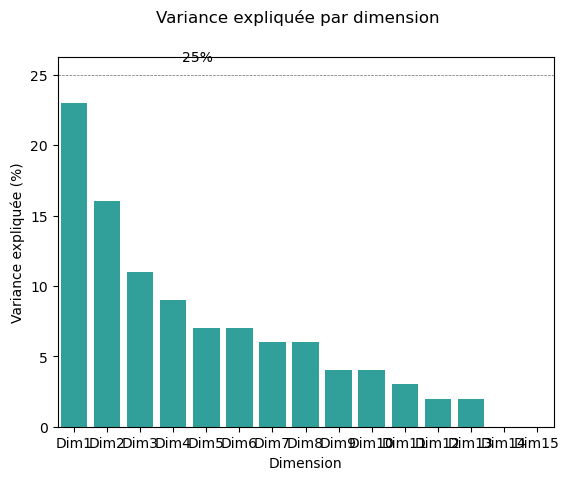

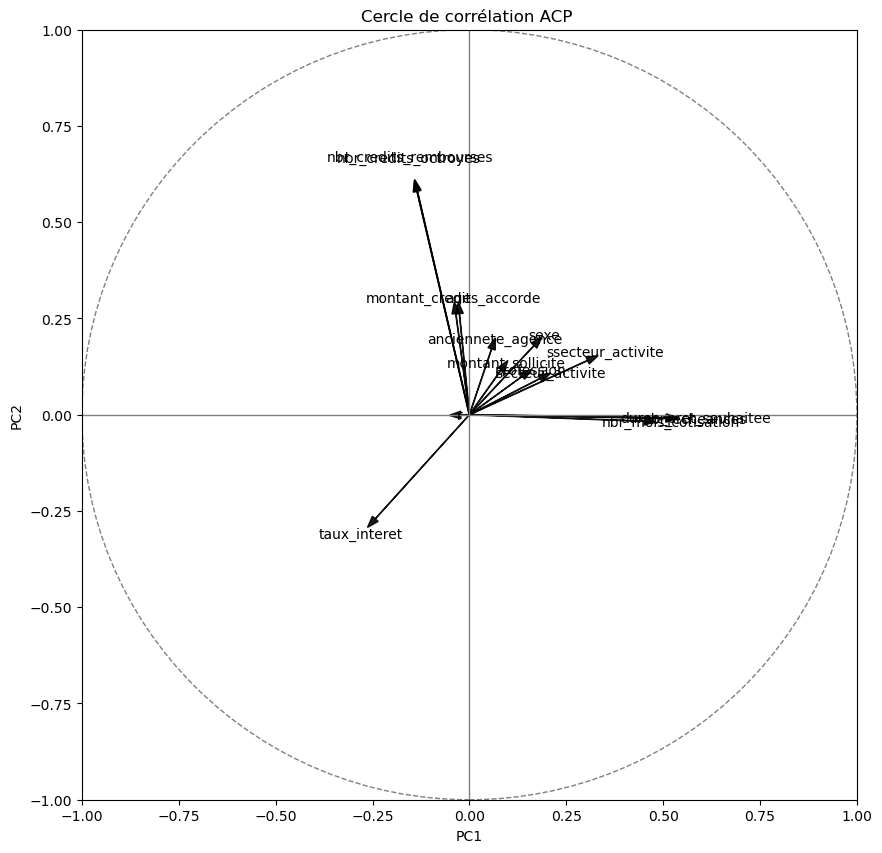

In [102]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler
from sklearn.decomposition import PCA
X=train.drop('a_dette_encours',axis=1)
y=train['a_dette_encours']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA()
X_pca=pca.fit_transform(X_scaled)
# Analyse des valeurs propres
comp = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(15)], 
        "Valeur propre" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    },
    columns = ["Dimension", "Valeur propre", "% variance expliquée", "% cum. var. expliquée"]
)
comp
# Scree plot pour choisir le nombre de composantes principales
g_comp = sns.barplot(x = "Dimension", 
                y = "% variance expliquée",
                palette = ["lightseagreen"],
                data = comp)
g_comp.set(ylabel = "Variance expliquée (%)")
g_comp.figure.suptitle("Variance expliquée par dimension")
plt.axhline(y = 25, linewidth = .5, color = "dimgray", linestyle = "--") # 25 = 100 / 4 (nb dimensions)
plt.text(3.25, 26, "25%")
# Calcul du cosinus carré des variables
cos_squared = np.square(pca.components_)

# Création d'un dataframe pandas avec le cosinus carré des variables
df_cos_squared = pd.DataFrame(cos_squared, columns=['PC{}'.format(i+1) for i in range(X.shape[1])])
df_cos_squared.index = train.columns[:-1]

print(df_cos_squared)
# Contribution à la formation de l'axe
# Obtenir les composantes principales
components = pca.components_

n_components = X.shape[1]
feature_names=X.select_dtypes(exclude=['object'])
feature_names=feature_names.columns
# Calculer la contribution des variables à la formation des axes
loadings = pca.components_.T
eigenvalues = pca.explained_variance_
variable_contributions = (loadings**2) * eigenvalues

# Créer un DataFrame pour faciliter l'affichage des résultats
column_names = [f'PC{i+1}_contrib' for i in range(n_components)]
variable_contrib_df = pd.DataFrame(variable_contributions, columns=column_names, index=feature_names)

print(variable_contrib_df)
# Créer le cercle de corrélation
coeff = np.transpose(pca.components_[0:2, :])
n = coeff.shape[0]
xs = np.array([1, 0])
ys = np.array([0, 1])

# Créer la figure
plt.figure(figsize=(10, 10))

# Placer les vecteurs des variables
for i in range(n):
    plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='k', alpha=0.9, head_width=0.02)
    plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, feature_names[i], color='k', ha='center', va='center')

# Placer le cercle unitaire
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Ajuster les limites et les axes
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axhline(0, color='gray', linewidth=1)
plt.axvline(0, color='gray', linewidth=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cercle de corrélation ACP ')

# Afficher la figure
plt.show()

In [103]:
FIN=train.copy()
# Enregistrer en csv
FIN.to_csv("Base2.csv")

In [104]:

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.3,random_state=1)

In [105]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
models=[]
models.append(("Logistic Regression",LogisticRegression()))
models.append(("Decision Tree",DecisionTreeClassifier()))
models.append(("Linear Discriminant Analysis",LinearDiscriminantAnalysis()))
models.append(("Random Forest",RandomForestClassifier()))
models.append(("Support Vector Classifier",SVC()))
models.append(("K- Neirest Neighbour",KNeighborsClassifier()))
models.append(("Naive Bayes",GaussianNB()))
models.append(("XG Boost", XGBClassifier()))
models.append(("AdaBoost",AdaBoostClassifier()))
scoring='accuracy'
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
result=[]
names=[]

In [107]:
for name,model in models:
    kfold=KFold(n_splits=10)
    #random_state=0
    cv_result=cross_val_score(model,train_X,train_y,cv=kfold,scoring=scoring)
    result.append(cv_result)
    names.append(name)
    print(model)
    print("%s %f" % (name,cv_result.mean()))
    #La définition d'un random_state n'a aucun effet puisque shuffle est False. Vous devez laisser random_state sa valeur par défaut (Aucun) ou définir shuffle=True

LogisticRegression()
Logistic Regression 0.843440
DecisionTreeClassifier()
Decision Tree 0.904218
LinearDiscriminantAnalysis()
Linear Discriminant Analysis 0.872858
RandomForestClassifier()
Random Forest 0.927922
SVC()
Support Vector Classifier 0.845871


C:\Users\HOME\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HOME\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

KNeighborsClassifier()
K- Neirest Neighbour 0.884893
GaussianNB()
Naive Bayes 0.843076
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
XG Boost 0.936309
AdaBoostClassifier()
AdaBoost 0.923666


In [108]:
from xgboost import XGBClassifier
from sklearn import metrics

mod = XGBClassifier()
mod.fit(train_X, train_y)
y_pred = mod.predict(test_X)

# Afficher le rapport de classification
print(metrics.classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      3006
           1       0.83      0.75      0.79       521

    accuracy                           0.94      3527
   macro avg       0.89      0.86      0.88      3527
weighted avg       0.94      0.94      0.94      3527

